<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Copy_of_AdvML_Review_Session_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AML Review Session - Week 8

In [ ]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Cleaning Data

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0017-2324/main/datasets/titanic.csv')

In [ ]:
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Here you must do all the data exploration that you would for a new dataset - I am just skipping this for timing

e.g.
<br>.shape
<br>.info()
<br>.desc()
<br>.query() / .loc[ ]

In [ ]:
# Drop columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [ ]:
# I'm just dropping all null values here but you should clean these properly - refer to my data cleaning tutorial in the MLC Moodle area
df_cleaned = df.dropna()

In [ ]:
print("Shape before cleaning: ", df.shape)
print("Shape after cleaning: ", df_cleaned.shape)

Shape before cleaning:  (891, 8)
Shape after cleaning:  (712, 8)


## Dataframe Pre-Processing for ML

In [ ]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], prefix='enc')

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,enc_female,enc_male,enc_C,enc_Q,enc_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
# Create a new column 'FamilySize' by adding 'Parch' and 'SibSp'
df_encoded['FamilySize'] = df_encoded['Parch'] + df_encoded['SibSp'] + 1

In [ ]:
# Drop columns
df_encoded = df_encoded.drop(columns=['enc_male', 'enc_Q', 'SibSp', 'Parch'])

In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y
X, y = df_encoded.drop(columns='Survived'), df_encoded['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Pclass,Age,Fare,enc_female,enc_C,enc_S,FamilySize
PassengerId,,,,,,,
1,3,22.0,7.2500,0,0,1,2
2,1,38.0,71.2833,1,1,0,2
3,3,26.0,7.9250,1,0,1,1
4,1,35.0,53.1000,1,0,1,2
5,3,35.0,8.0500,0,0,1,1


In [ ]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## Week 1. Random Forests and Feature Importance

Random Forest is an ensemble method that involves majority voting - created from subsets of data and final output is based on the majority vote. Therefore, RF are insensitive to overfitting.

### Random Forest Models and Feature Importance

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

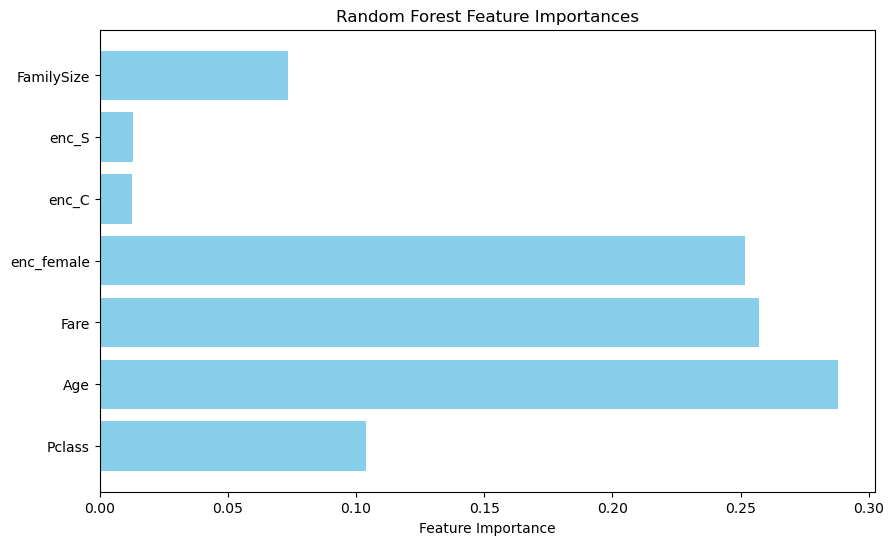

In [ ]:
# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

#### If you want this in order, there's a few more steps...

In [ ]:
# Get array of feature importances
feature_importances = rf.feature_importances_
feature_importances

array([0.10402054, 0.28788153, 0.25731651, 0.25176105, 0.01257169,
       0.01285569, 0.07359298])

In [ ]:
# Create index of corresponding feature names (excluding target)
feature_names = X.columns[:-1]
feature_names

Index(['Pclass', 'Age', 'Fare', 'enc_female', 'enc_C', 'enc_S'], dtype='object')

In [ ]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances[:-1]})
feature_importance_df

,Feature,Importance
0,Pclass,0.104021
1,Age,0.287882
2,Fare,0.257317
3,enc_female,0.251761
4,enc_C,0.012572
5,enc_S,0.012856


In [ ]:
# Sort dataframe by importance (ascending order is ascending=True, descending order is ascending=False)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
feature_importance_df

,Feature,Importance
4,enc_C,0.012572
5,enc_S,0.012856
0,Pclass,0.104021
3,enc_female,0.251761
2,Fare,0.257317
1,Age,0.287882


### Important Features:
`Age`
`enc_female`
`Fare`
`Pclass`
`FamilySize`

- Women and children were ushered onto the lifeboats first.
- First-class passengers took priority over other classes, so are we seeing a repetition of data in `Fare` and `Pclass`?

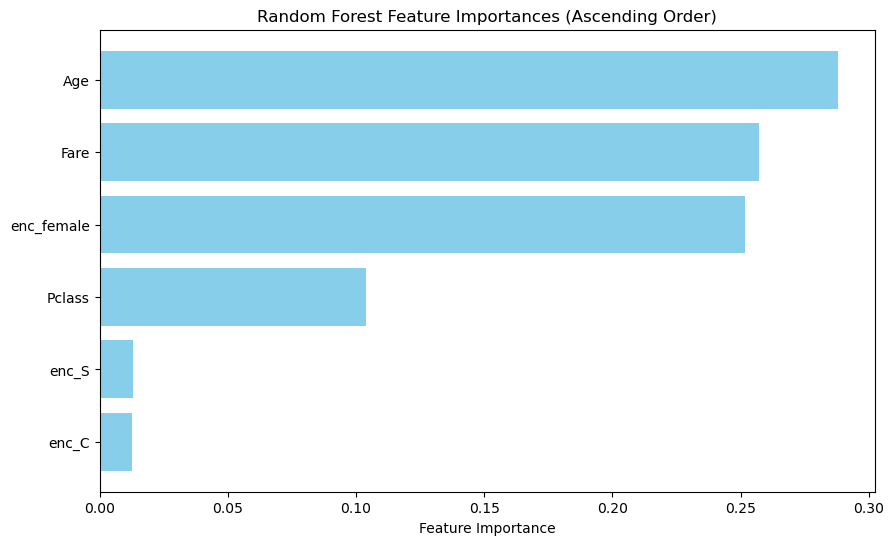

In [ ]:
# Plot Random Forest Feature Importances in ascending order
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances (Ascending Order)')
plt.show()

Takeaways:
<ul>
    <li>Identified features that could be dropped to reduce dimensionality and simplify the model to increase explainability and interpretability.</li>
    <li>Try reducing to 5 features and compare the results for each model.</li>
    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define X and y
X, y = df_encoded.drop(columns='Survived'), df_encoded['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Generate predictions
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy_allfeat = accuracy_score(y_test, y_pred)
print("Accuracy (all features):", accuracy_allfeat)

Accuracy (all features): 0.7832167832167832


In [ ]:
top_feat = ['Age', 'enc_female', 'Fare', 'Pclass', 'FamilySize']

# Define X and y
X, y = df_encoded[top_feat], df_encoded['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Generate predictions
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy_topfeat = accuracy_score(y_test, y_pred)
print("Accuracy (top features):", accuracy_topfeat)

Accuracy (top features): 0.7692307692307693


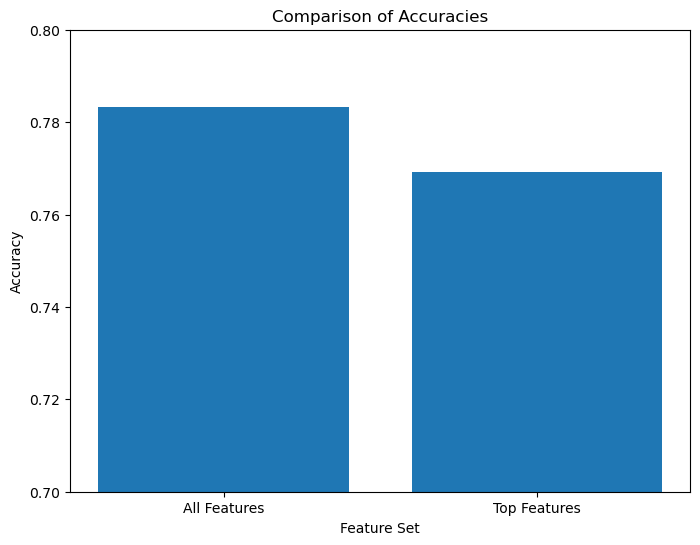

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracies and feature sets
accuracies = [accuracy_allfeat, accuracy_topfeat]
feature_sets = ['All Features', 'Top Features']

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(feature_sets, accuracies)
plt.xlabel('Feature Set')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.ylim(0.7, 0.8)  # Limit the y-axis to better visualise differences
plt.show()

## Week 2. Polynomial and Interaction Features

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Linear Regression and Polynomial Interactions

This section highlights that using every tool in your kit doesn't always work and it is dataset dependent - use what represents the data best and provides the best interpretation and explainability!

In [ ]:
import sklearn
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df_encoded.dtypes

Survived        int64
Pclass          int64
Age           float64
Fare          float64
enc_female      uint8
enc_C           uint8
enc_S           uint8
FamilySize      int64
dtype: object

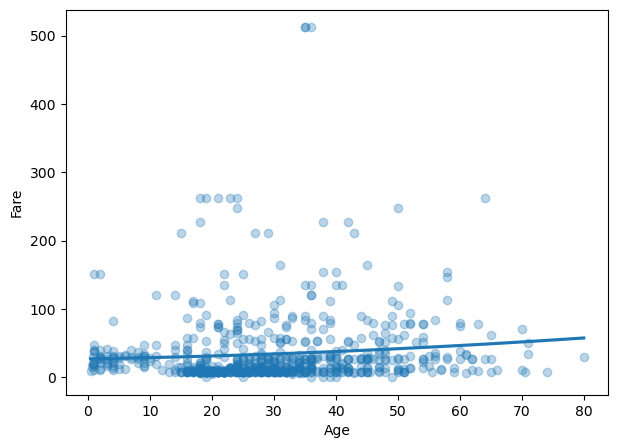

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=df_encoded, x='Age', y='Fare', order=2,
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

In [ ]:
Pclass1 = df_encoded.query('Pclass==1')
Pclass2 = df_encoded.query('Pclass==2')
Pclass3 = df_encoded.query('Pclass==3')

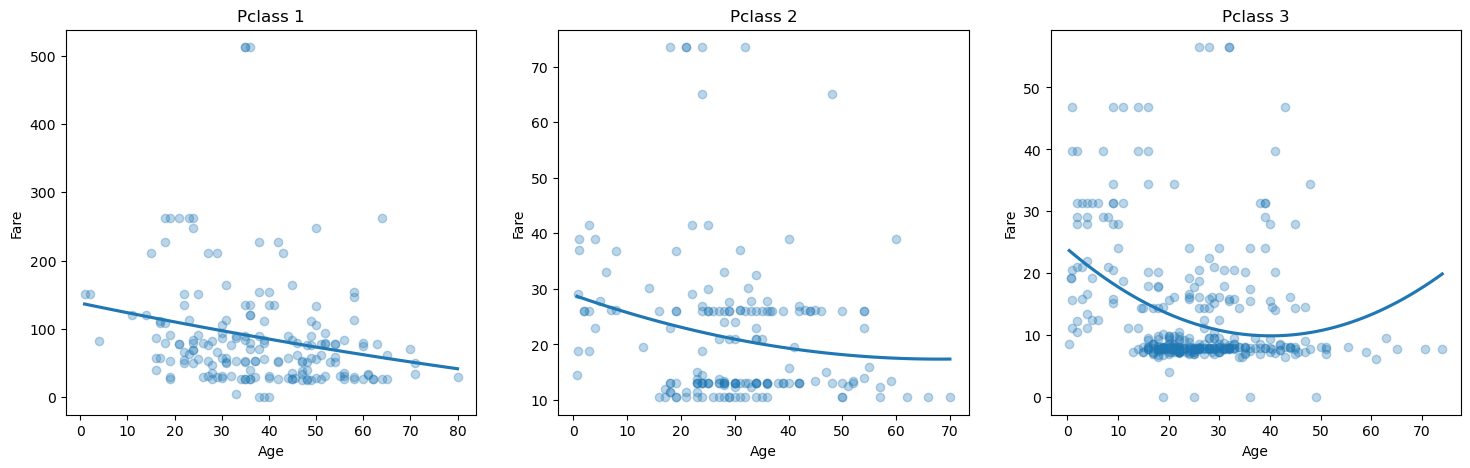

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pclass 1
sns.regplot(
    data=Pclass1, x='Age', y='Fare', order=2,
    scatter_kws=dict(alpha=0.3), ax=axes[0], ci=None
)
axes[0].set_title('Pclass 1')

# Pclass 2
sns.regplot(
    data=Pclass2, x='Age', y='Fare', order=2,
    scatter_kws=dict(alpha=0.3), ax=axes[1], ci=None
)
axes[1].set_title('Pclass 2')

# Pclass 3
sns.regplot(
    data=Pclass3, x='Age', y='Fare', order=2,
    scatter_kws=dict(alpha=0.3), ax=axes[2], ci=None
)
axes[2].set_title('Pclass 3')

plt.show()


In [ ]:
X, y = Pclass1[['Age']], Pclass1['Fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
normal_reg = Pipeline(
    steps=[
        ('est', LinearRegression())
    ]
)

poly_reg = Pipeline(
    steps=[
        ('poly', PolynomialFeatures((3, 3), include_bias=False)),
        ('est', LinearRegression())
    ]
)

In [ ]:
normal_reg.fit(X_train, y_train)

Pipeline(steps=[('est', LinearRegression())])

In [ ]:
# for plotting the model prediction, some test data points
# only one feature
x_pred_range = pd.DataFrame(
    np.linspace(Pclass1['Age'].min(), Pclass1['Age'].max(), 100),
    columns=['Age']
)

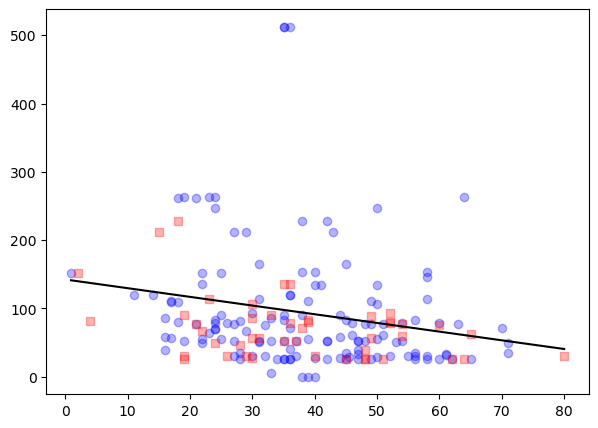

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X_train, y_train, alpha=0.3, marker='o', c='b')
ax.scatter(X_test, y_test, alpha=0.3, marker='s', c='r')
ax.plot(x_pred_range['Age'], normal_reg.predict(x_pred_range), c='k');

In [ ]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=(3, 3), include_bias=False)),
                ('est', LinearRegression())])

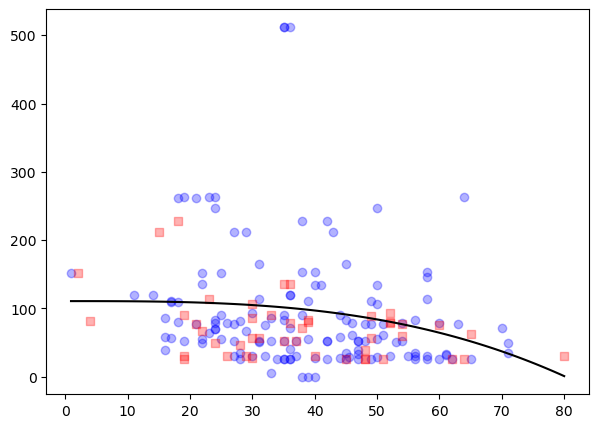

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X_train, y_train, alpha=0.3, marker='o', c='b')
ax.scatter(X_test, y_test, alpha=0.3, marker='s', c='r')
ax.plot(x_pred_range['Age'], poly_reg.predict(x_pred_range), c='k');

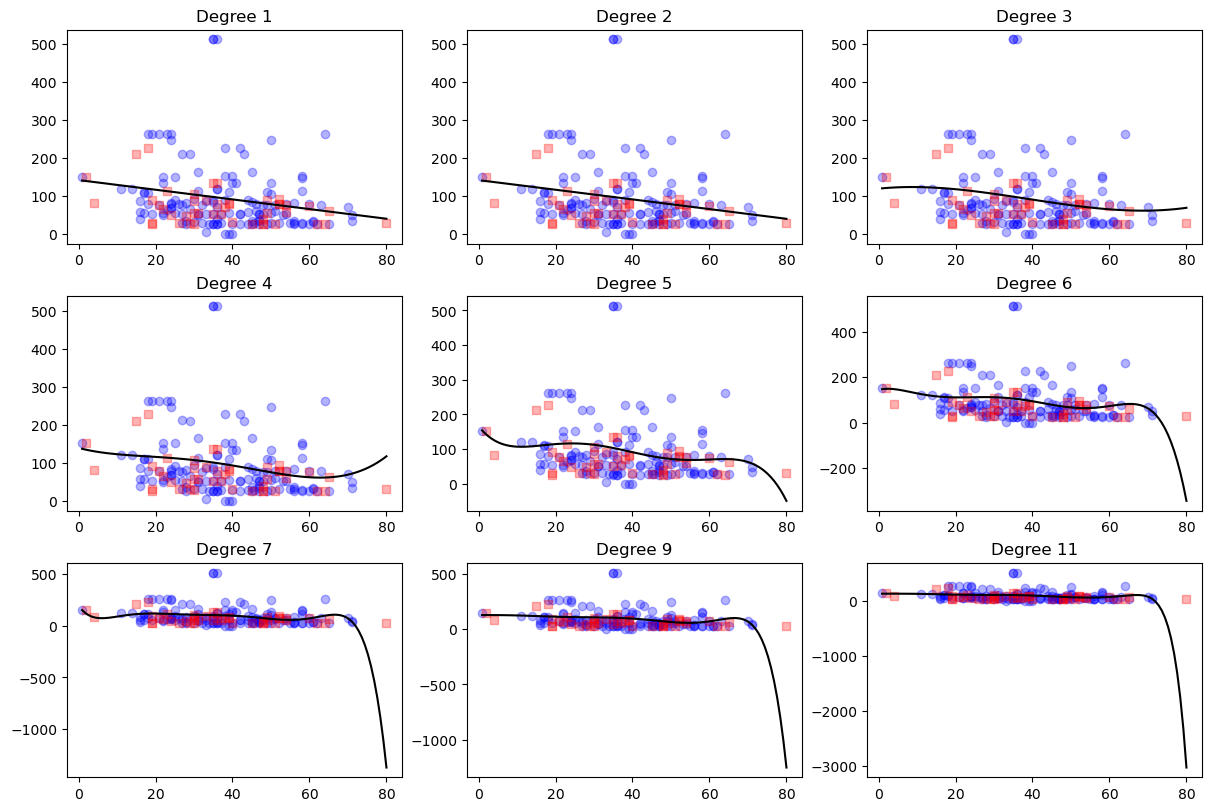

In [ ]:
orders = [1,2,3,4,5,6,7,9,11]
fig, axs = plt.subplots(3, 3, figsize=(12,8), constrained_layout=True)
lr_models = [ ]
for ax, order in zip(axs.ravel(), orders):
    model = make_pipeline(
        PolynomialFeatures(degree=order, include_bias=False),
        LinearRegression()
    )
    lr_models.append(
        model.fit(X_train, y_train)
    )
    ax.scatter(X_train, y_train, alpha=0.3, marker='o', c='b');
    ax.scatter(X_test, y_test, alpha=0.3, marker='s', c='r')
    ax.plot(x_pred_range['Age'], model.predict(x_pred_range), c='k')
    ax.set_title(f'Degree {order}')

### Interaction Features

In [ ]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

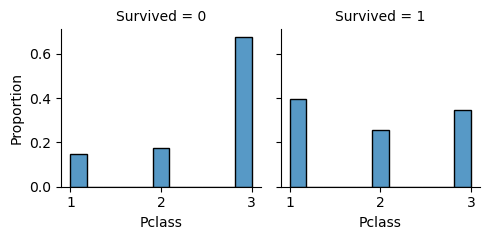

In [ ]:
sns.displot(
    data=df, x='Pclass', col='Survived', col_wrap=2, height=2.5,
    stat='proportion', common_norm=False
);

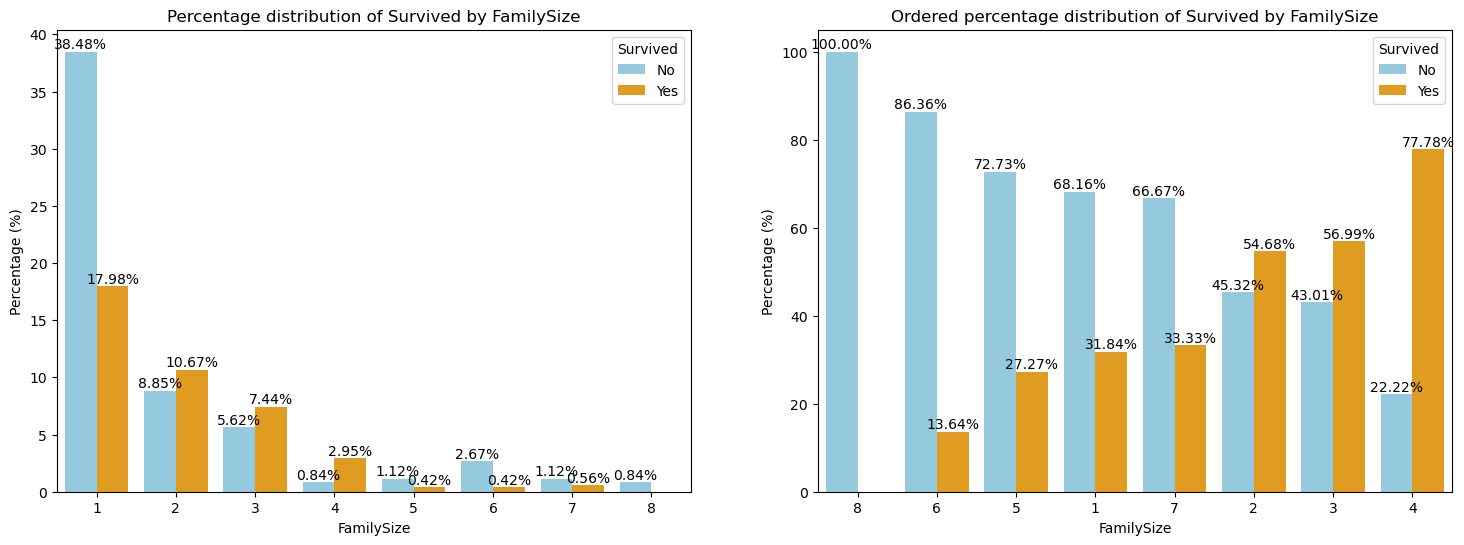

In [ ]:
# Create a custom legend dictionary
legend_dict = {0: 'No', 1: 'Yes'}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First subplot - Bar plot with percentage distribution
sns.barplot(
    data=df_encoded, x='FamilySize', y='Survived',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    estimator=lambda x: len(x) / len(df_encoded['FamilySize']) * 100,  # Calculate the percentage
    ax=axes[0]
)
axes[0].set_title('Percentage distribution of Survived by FamilySize')
axes[0].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[0].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[0].legend(handles, custom_labels, title='Survived', loc='upper right')

# Second subplot - Stacked bar plot with survival proportions
survival_proportions = (
    df_encoded.groupby('FamilySize')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order = survival_proportions[survival_proportions['Survived'] == 0].sort_values('Percentage', ascending=False)['FamilySize']

sns.barplot(
    data=survival_proportions, x='FamilySize', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order,
    ax=axes[1]
)
axes[1].set_title('Ordered percentage distribution of Survived by FamilySize')
axes[1].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[1].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[1].legend(handles, custom_labels, title='Survived', loc='upper right')

plt.show()

Takeaways:
- Larger family sizes were less likely to survive.
- Passengers travelling alone (`FamilySize`=1) only had a 32% survival rate.
- Groups of 2, 3, or 4 were most likely to survive - women and children?

"Women born in 1910 and 1935 started their childbearing at the youngest ages with a median age at first birth of 21 years; more than 70 percent of their first births occurred to women under age 25." cdc.gov - average childbearing age of US women

In [ ]:
subset_adult = df.query('Age>=21 and Parch>0')
print("Adults travelling with children (assumption): ", subset_adult.shape)
subset_child = df.query('Age<21 and Parch>0')
print("Children travelling with parents (assumption): ", subset_child.shape)

Adults travelling with children (assumption):  (100, 8)
Children travelling with parents (assumption):  (93, 8)


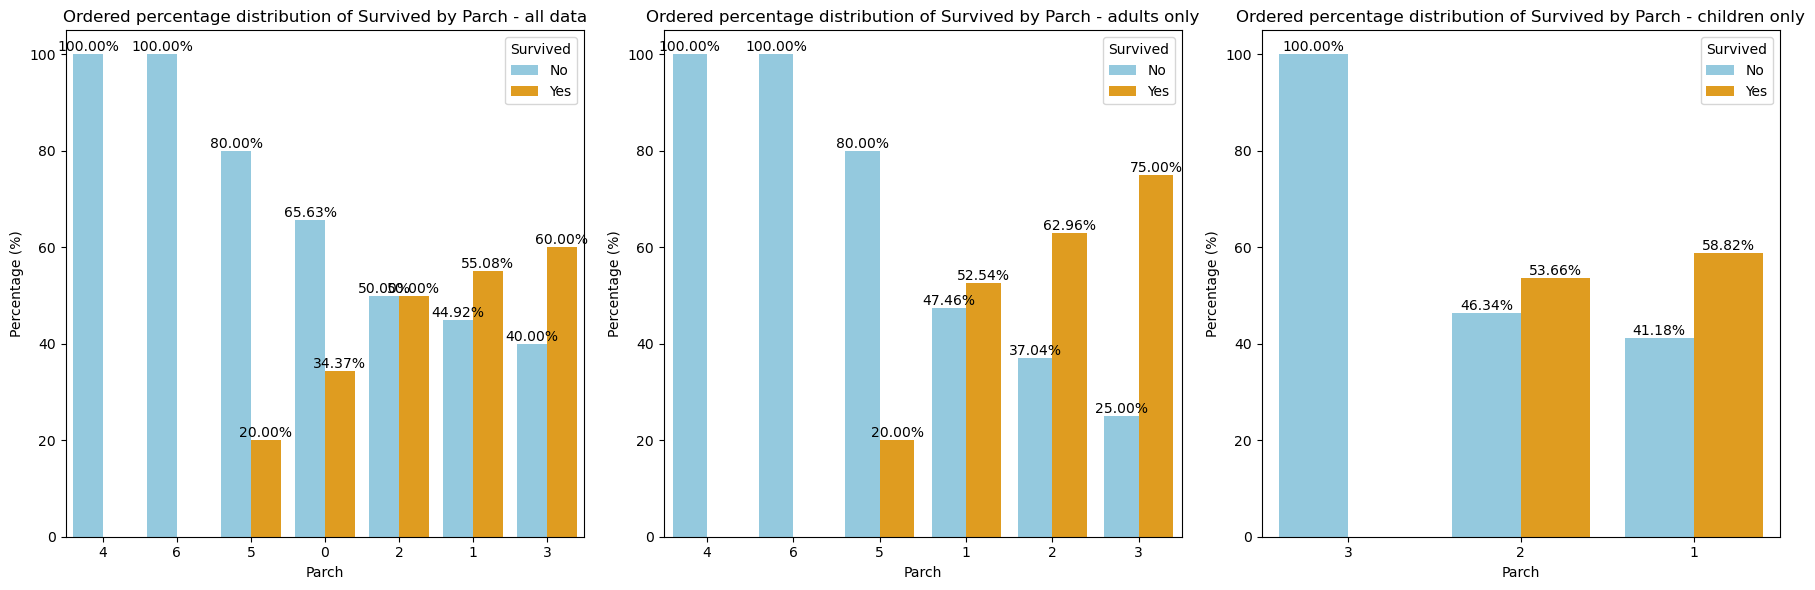

In [ ]:
# Create a custom legend dictionary
legend_dict = {0: 'No', 1: 'Yes'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot - Stacked bar plot with survival proportions (all data)
survival_proportions_all = (
    df.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_all = survival_proportions_all[survival_proportions_all['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_all, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_all,
    ax=axes[0]
)
axes[0].set_title('Ordered percentage distribution of Survived by Parch - all data')
axes[0].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[0].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[0].legend(handles, custom_labels, title='Survived', loc='upper right')

# Second subplot - Stacked bar plot with survival proportions (adults only)
survival_proportions_adults = (
    subset_adult.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_adults = survival_proportions_adults[survival_proportions_adults['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_adults, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_adults,
    ax=axes[1]
)
axes[1].set_title('Ordered percentage distribution of Survived by Parch - adults only')
axes[1].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[1].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[1].legend(handles, custom_labels, title='Survived', loc='upper right')

# Third subplot - Stacked bar plot with survival proportions (children only)
survival_proportions_children = (
    subset_child.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_children = survival_proportions_children[survival_proportions_children['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_children, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_children,
    ax=axes[2]
)
axes[2].set_title('Ordered percentage distribution of Survived by Parch - children only')
axes[2].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[2].patches:
    height = patch.get_height()
    axes[2].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[2].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[2].legend(handles, custom_labels, title='Survived', loc='upper right')

plt.tight_layout()
plt.show()


Takeaways:<br><br>

<u>Larger Family Sizes and Survival:</u><br>
<b>Observation: </b>Larger family sizes were less likely to survive.<br>
<b>Evaluation: </b>This suggests that having a larger number of family members aboard may have made it more challenging to secure a spot on a lifeboat or navigate during the evacuation.<br><br>

<u>Passengers Travelling Alone: </u><br>
<b>Observation: </b>Passengers travelling alone (`Parch`=0) had a significantly lower survival rate, with only 34% surviving rate.<br>
<b>Evaluation: </b>This indicates that travelling without any family members may have decreased the chances of survival.<br><br>

<u>Survival Rate for groups of 2, 3, or 4:</u><br>
<b>Observation: </b>Passengers travelling with 1, 2, or 3 other people were most likely to survive.<br>
<b>Evaluation: </b>This observation raises the possibility that these groups, especially those with women and children, may have received priority access to lifeboats or assistance during the evacuation.<br><br>

<u>Relationship between Adults and Children:</u><br>
<b>Observation: </b>Adults travelling with fewer children were more likely to survive.<br>
<b>Evaluation: </b>This suggests that having fewer dependent children may have facilitated their survival, possibly by allowing them to focus on their own evacuation or by receiving assistance more readily.<br><br>

<u>Survival of adults versus children:</u><br>
<b>Observation: </b>Adults were more likely to survive than the children if they were travelling together.<br>
<b>Evaluation: </b>This could be due to adults prioritising the safety of children or adults being perceived as more capable of survival in the chaotic evacuation process.

In [ ]:
subset_mothers = df.query('Age>=21 and Parch>0 and Sex=="female"')
print("Mothers travelling with children (assumption): ", subset_mothers.shape)
subset_fathers = df.query('Age>=21 and Parch>0 and Sex=="male"')
print("Fathers travelling with children (assumption): ", subset_fathers.shape)
subset_adult_male = df.query('Age>=21 and Parch==0 and Sex=="male"')
print("Males travelling without children (assumption): ", subset_adult_male.shape)
subset_adult_female = df.query('Age>=21 and Parch==0 and Sex=="female"')
print("Feales travelling without children (assumption): ", subset_adult_female.shape)

Mothers travelling with children (assumption):  (63, 8)
Fathers travelling with children (assumption):  (37, 8)
Males travelling without children (assumption):  (313, 8)
Feales travelling without children (assumption):  (121, 8)


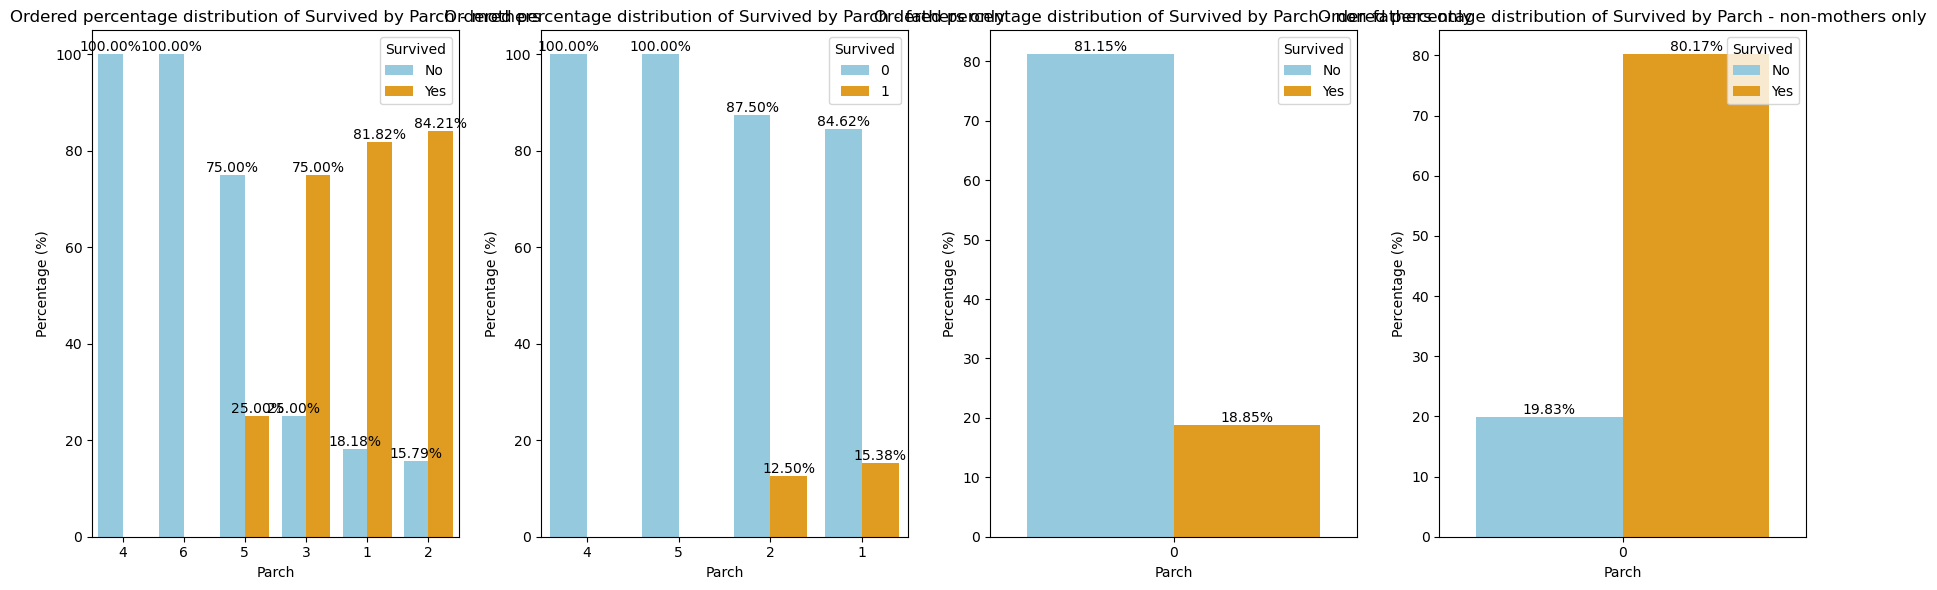

In [ ]:
# Create a custom legend dictionary
legend_dict = {0: 'No', 1: 'Yes'}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# First subplot - Stacked bar plot with survival proportions (mothers)
survival_proportions_mothers = (
    subset_mothers.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_mothers = survival_proportions_mothers[survival_proportions_mothers['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_mothers, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_mothers,
    ax=axes[0]
)
axes[0].set_title('Ordered percentage distribution of Survived by Parch - mothers')
axes[0].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[0].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[0].legend(handles, custom_labels, title='Survived', loc='upper right')

# Second subplot - Stacked bar plot with survival proportions (fathers)
survival_proportions_fathers = (
    subset_fathers.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_fathers = survival_proportions_fathers[survival_proportions_fathers['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_fathers, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_fathers,
    ax=axes[1]
)
axes[1].set_title('Ordered percentage distribution of Survived by Parch - fathers only')
axes[1].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Third subplot - Stacked bar plot with survival proportions (non-fathers)
survival_proportions_males = (
    subset_adult_male.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_males = survival_proportions_males[survival_proportions_males['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_males, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_males,
    ax=axes[2]
)
axes[2].set_title('Ordered percentage distribution of Survived by Parch - non-fathers only')
axes[2].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[2].patches:
    height = patch.get_height()
    axes[2].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[2].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[2].legend(handles, custom_labels, title='Survived', loc='upper right')



# Fourth subplot - Stacked bar plot with survival proportions (non-mothers)
survival_proportions_females = (
    subset_adult_female.groupby('Parch')['Survived']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

order_females = survival_proportions_females[survival_proportions_females['Survived'] == 0].sort_values('Percentage', ascending=False)['Parch']

sns.barplot(
    data=survival_proportions_females, x='Parch', y='Percentage',
    hue='Survived', palette={0: 'skyblue', 1: 'orange'},
    order=order_females,
    ax=axes[3]
)
axes[3].set_title('Ordered percentage distribution of Survived by Parch - non-mothers only')
axes[3].set_ylabel('Percentage (%)')

# Add percentage values on each bar
for patch in axes[3].patches:
    height = patch.get_height()
    axes[3].annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., height),
                     ha='center', va='bottom', color='black')

# Create custom legend
handles, labels = axes[3].get_legend_handles_labels()
custom_labels = [legend_dict[int(label)] for label in labels]
axes[3].legend(handles, custom_labels, title='Survived', loc='upper right')

plt.tight_layout()
plt.show()

Takeaways:<br><br>

<u>Gender of parent:</u><br>
<b>Observation: </b>Women travelling with children were 60-70% more likely to survive then men travelling with children.<br>
<b>Evaluation: </b>This observation could be attributed to the fact that priority was given to women and children due to the social norms and expectations of the time regarding protection of women and children.<br><br>

<u>Survival rate of non-fathers or men travelling alone: </u><br>
<b>Observation: </b>Adult men who were travelling alone had only a small advantage in survival compared to men who were accompanied by children, with the difference being approximately 5%.<br>
<b>Evaluation: </b>This indicates that the presence of children among male passengers did not significantly impact their chances of survival, as adult men travelling alone had only a slight edge in survival rates.<br><br>

<u>Survival rate of non-mothers or women travelling alone: </u><br>
<b>Observation: </b>Adult women who were travelling alone had a significantly higher probability of survival than men but, on average, their chance of survival was the same as those travelling with up to 2 children.<br>
<b>Evaluation: </b>This suggests that, despite the potential challenges and responsibilities associated with travelling with children, the presence of children did not significantly impact the survival chances of adult women during the Titanic disaster.<br><br>

## Week 3. SHAP Explanations and Permutation Importance

### SHAP Coarse and Fine Grained Explanations

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# SHAP is not normally part of a standard Python distribution
# I am installing it here by asking the underlying operating system to
# `pip install` the package (`-q` for a quiet output)
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

In [ ]:
X, y = df_encoded.drop(columns='Survived'), df_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [ ]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'enc_female', 'enc_C', 'enc_S', 'FamilySize'], dtype='object')

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit to training data
clf.fit(X_train, y_train)
# Run cross-validation scores on the training set
cross_val_scores = cross_val_score(clf, X_train, y_train)
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.81308411 0.77570093 0.85046729 0.71962617 0.77358491]


In [ ]:
# Instantiate an Explainer object for global and local explanations on the Random Forest Model
explainer = shap.Explainer(clf, X_train)

# Ask the explainer for the SHAP values on the test data
explanations = explainer(X_test, check_additivity=False)

print(explanations.shape)

(178, 7, 2)


In [ ]:
# Get a random row index where Survived == 0 from the test set
random_row_index_survived_0 = y_test[y_test == 0].sample(n=1, random_state=0).index[0]

# Get a random row index where Survived == 1 from the test set
random_row_index_survived_1 = y_test[y_test == 1].sample(n=1, random_state=0).index[0]

# Find the index of the random row in the test set
row_idx_test_0 = X_test.index.get_loc(random_row_index_survived_0)
row_idx_test_1 = X_test.index.get_loc(random_row_index_survived_1)

# Ensure the index is within bounds
row_idx_test_0 = min(row_idx_test_0, explanations.shape[0] - 1)
row_idx_test_1 = min(row_idx_test_1, explanations.shape[0] - 1)

### Random Row of Passenger Who Did Not Survive

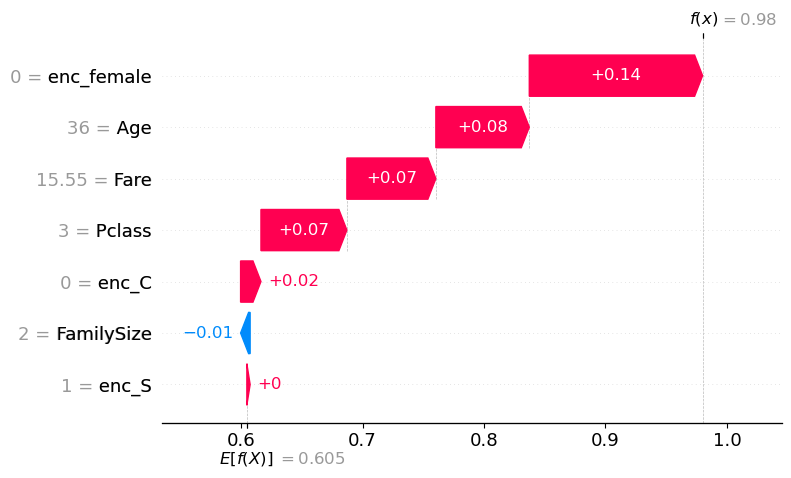

In [ ]:
shap.plots.waterfall(explanations[row_idx_test_0, :, 0])
shap.plots.force(explanations[row_idx_test_0, :, 0])

### Random Row of Passenger Who Survived

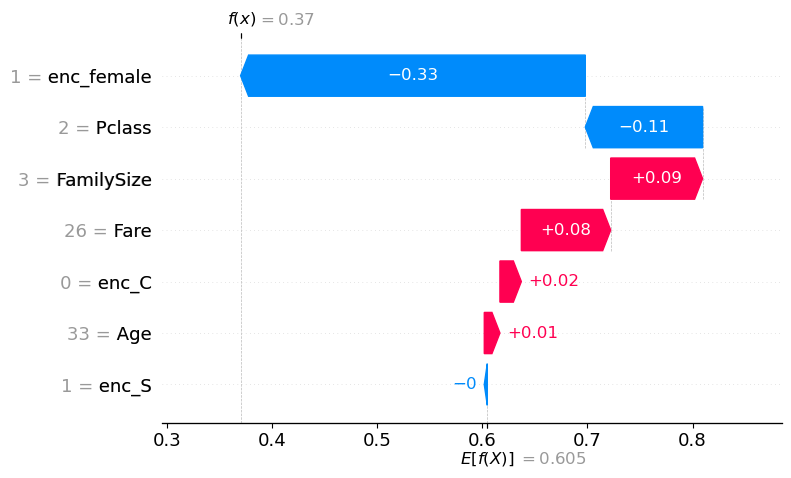

In [ ]:
shap.plots.waterfall(explanations[row_idx_test_1, :, 0])
shap.plots.force(explanations[row_idx_test_1, :, 0])

### Global Explanation

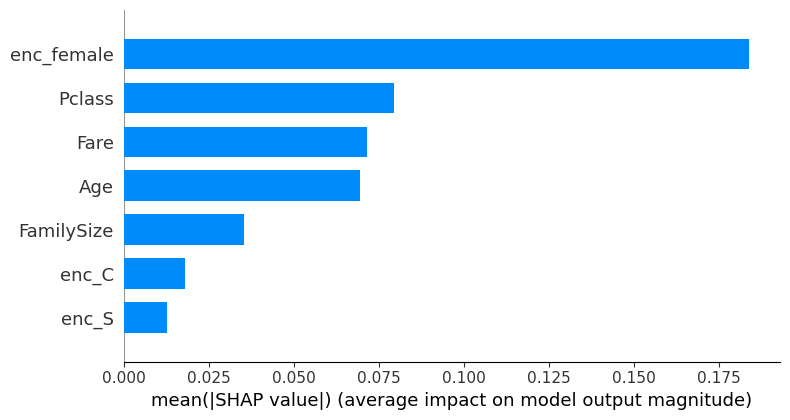

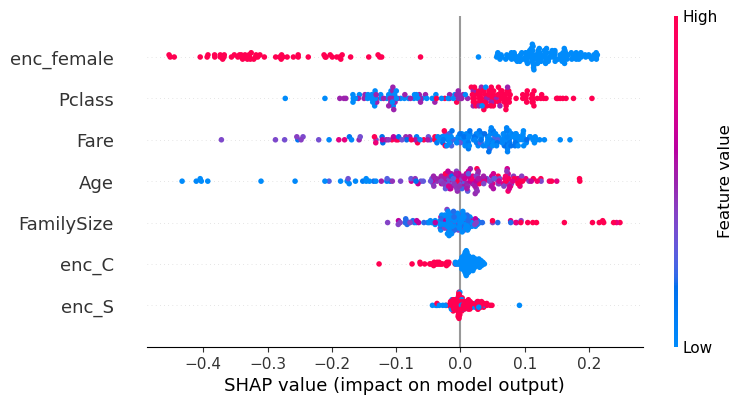

In [ ]:
shap.summary_plot(explanations[:,:,0], plot_type="bar")
shap.plots.beeswarm(explanations[:, :, 0])

Takeaways:

### TL:DR
- `Sex` is an important feature on both a fine- and coarse-grained scale. It either has a positive or negative effect, depending on whether the passenger survived or was deceased.
- Other features are variably important on a fine-grained (individual) scale, although most features contribute positively to the model prediction for the `Survived` class and variably for the `Deceased` class.

### Individual Analysis
Go through all the features, one-by-one. Here I've just picked a couple:

- `Sex` = 0 (male) - being male contributed negatively to the survival of the passenger and this contribution was significantly larger than other contributions.
- Overall `Pclass` contributes negatively to the model outcome. The way this feature has been encoded means that we cannot interpret between the different classes using SHAP. If we encode as `Pclass_1`, `P_class2`, `Pclass_3` and treat each class as a separate feature, we can have a more fine-grained evaluation. This would show, as we have seen in other associations and analyses, that being 3rd class negatively affected a passengers survival chances.
- `Fare` contributed positively for both passengers evaluated.
- Embarking from Southampton had no effect for these individual passengers.

### Global Analysis
Again, go through each feature, but here I've just picked one as an example:

`Fare`
- <b>Observation: </b>There is a large variance across model impacts. Although there is a sharp divide between low fares having a positive or small negative impact on model output and moderate and high fares negatively impacting the model output, there are some instances of low fares having a negative impact on model output. This means that the relationship between fare and survival is not entirely straightforward. While higher fares generally correlate with a higher likelihood of survival, there are exceptions where passengers who paid lower fares also managed to survive.

- <b>Evaluation: </b>Passengers who paid higher fares may have had access to better accommodations or were given priority access to lifeboats, increasing their chances of survival. Alternatively, higher fare prices might be correlated with certain passenger classes (e.g., first class), which may have been given preference during the evacuation process. It's also possible that passengers who paid lower fares were located in less favorable areas of the ship or were less likely to receive assistance during the evacuation, leading to a lower survival rate.

![SHAP Review Plots](SHAP-Review.png)

## Permutation Importance

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [ ]:
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=0
)

In [ ]:
perm_importance = permutation_importance(
    clf, X_test, y_test, n_repeats=30, random_state=0, scoring='r2'
)

In [ ]:
perm_importance_df = pd.DataFrame(
    dict(
        feature=X_test.columns,
        pi_mean=perm_importance['importances_mean'],
        pi_std=perm_importance['importances_std']
    )
)

In [ ]:
# Sorting by permutation importance mean
perm_importance_df_sorted = perm_importance_df.sort_values(by='pi_mean', ascending=True)
perm_importance_df_sorted

,feature,pi_mean,pi_std
5,enc_S,0.046695,0.038697
4,enc_C,0.052412,0.028668
6,FamilySize,0.285886,0.072324
0,Pclass,0.451699,0.099692
2,Fare,0.507923,0.060278
1,Age,0.682314,0.090022
3,enc_female,1.006317,0.105791


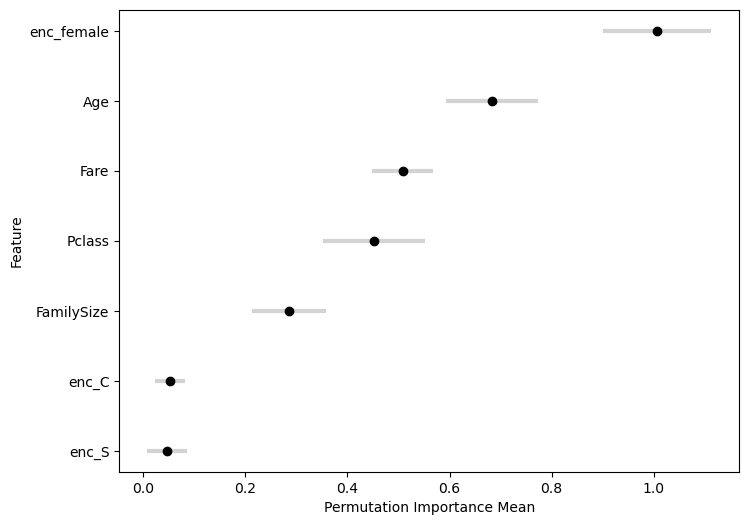

In [ ]:
# Visualisation Option 1: Error Bars
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(
    perm_importance_df_sorted['pi_mean'],
    perm_importance_df_sorted['feature'],
    xerr=perm_importance_df_sorted['pi_std'],
    fmt='o', color='black',
    ecolor='lightgray', elinewidth=3, capsize=0
)

ax.set_ylabel('Feature')
ax.set_xlabel('Permutation Importance Mean');

plt.show()

Permutation importance mean for `enc_female` is high, suggesting that the model relies heavily on that feature for making accurate predictions. Therfore, in some form `Sex` must be included in the final model.

Conversely, `enc_C` and `enc_S` have little effect on the model, therefore the `Embarked` feature is not contributing to model accuracy. To simplify the model, the recommendation is to drop these features.

<h2>Permutation Importance Data</h2>
  
  <table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Positive/Negative</th>
      <th>Comment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>enc_S</td>
      <td>Positive</td>
      <td>This feature has a moderate impact on the model output, with some variability indicated by the standard deviation.</td>
    </tr>
    <tr>
      <td>enc_C</td>
      <td>Positive</td>
      <td>This feature has a moderate impact on the model output, with slightly lower variability indicated by the standard deviation.</td>
    </tr>
    <tr>
      <td>FamilySize</td>
      <td>Positive</td>
      <td>This feature has a significant impact on the model output, with some variability indicated by the standard deviation.</td>
    </tr>
    <tr>
      <td>Pclass</td>
      <td>Positive</td>
      <td>This feature has a substantial impact on the model output, with some variability indicated by the standard deviation.</td>
    </tr>
    <tr>
      <td>Fare</td>
      <td>Positive</td>
      <td>This feature has a significant impact on the model output, with relatively low variability indicated by the standard deviation.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Positive</td>
      <td>This feature has the most substantial impact on the model output, with some variability indicated by the standard deviation.</td>
    </tr>
    <tr>
      <td>enc_female</td>
      <td>Positive</td>
      <td>This feature has a very significant impact on the model output, with some variability indicated by the standard deviation.</td>
    </tr>
  </tbody>
</table>


## Week 4. SHAP - Regression and Interactions

In [ ]:
# latest version of scikit-learn: might need a kernel restart
!pip install --upgrade scikit-learn==1.4.0 -q

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# SHAP is not normally part of a standard Python distribution
# I am installing it here by asking the underlying operating system to
# `pip install` the package (`-q` for a quiet output)
!pip install -q shap
import shap
shap.initjs()

In [ ]:
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=0
)

### Logistic Regression - Partial Dependence Plots

In [ ]:
logr = LogisticRegression(max_iter=1000)
logr = logr.fit(X_train, y_train)

In [ ]:
explainer = shap.LinearExplainer(logr, X_train)
explainer

In [ ]:
shap_values = explainer(X_test)

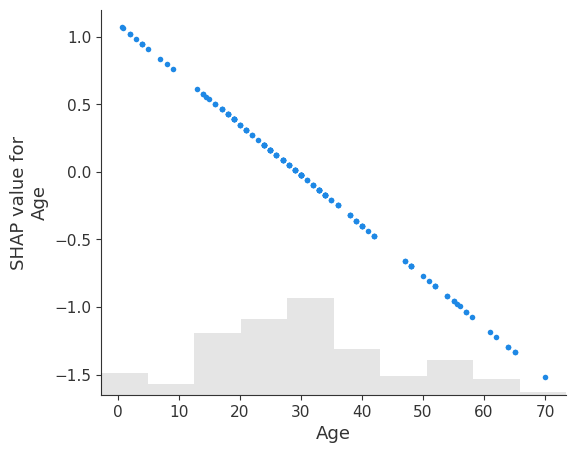

In [ ]:
shap.plots.scatter(shap_values[:, "Age"])

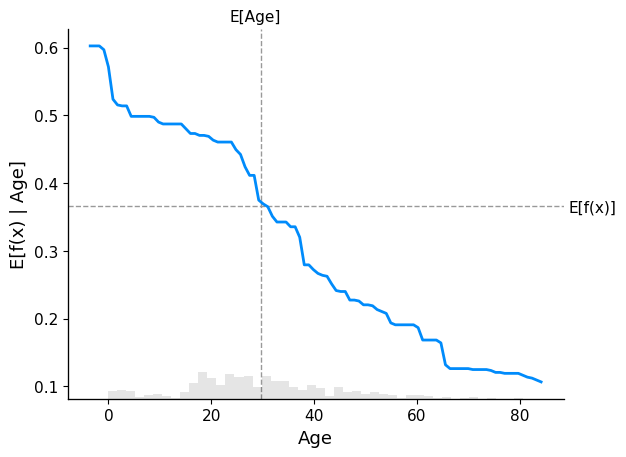

In [ ]:
feature_names = df_encoded.columns.tolist()
feature_names.remove("Survived")

df_pdp = df_encoded.drop(columns=['Survived'])


shap.partial_dependence_plot(
    "Age",
    logr.predict,
    df_pdp,
    feature_names=feature_names,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

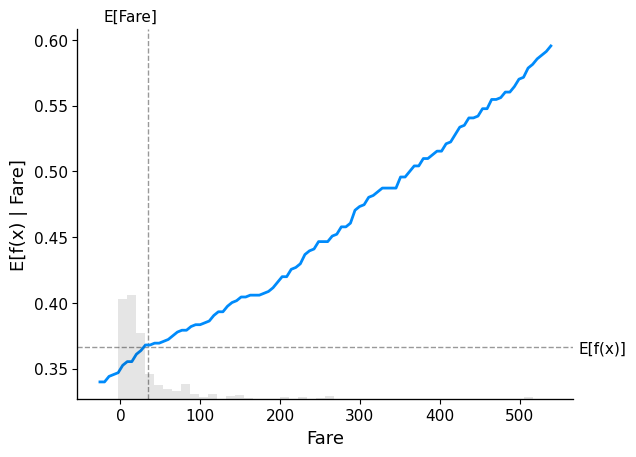

In [ ]:
shap.partial_dependence_plot(
    "Fare",
    logr.predict,
    df_pdp,
    feature_names=feature_names,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

Again, `Age` and `Fare` are our continuous numeric (float) features.

- The distribution of feature values is shown as a histogram on the x-axis and the PDP is shown as a scatter or line plot.
- The horizontal grey dashed line is the expected value of the model.
- The vertical grey dashed line is the average value of the feature.
- The intersection is the center is the dependence plot wrt the analysed feature, i.e. the mean of the feature.
<br>

- Inversely proportional negative linear relationship between `Age` and SHAP value.
- Inversely proportional positive linear relationship between `Fare` and SHAP value.
<br>

- Passengers older than around 30 years old and/or those who paid a fare higher than approximately £40 are predicted to have a higher chance of survival. This is observed by the fact that the feature values lie above the expected value of the model and to the right of the average value of the feature in the classic dependence plots, indicating that the corresponding feature has a positive impact on the predicted outcome.

### Random Forest

In [ ]:
# Create and fit a Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = rfc.fit(X_train, y_train)

In [ ]:
explainer = shap.TreeExplainer(rfc, X_train)
explainer

In [ ]:
shap_values = explainer(X_test)

In [ ]:
# Get a random row index where Survived == 0 from the test set
random_row_index_survived_0 = y_test[y_test == 0].sample(n=1, random_state=0).index[0]

# Get a random row index where Survived == 1 from the test set
random_row_index_survived_1 = y_test[y_test == 1].sample(n=1, random_state=0).index[0]

# Find the index of the random row in the test set
row_idx_test_0 = X_test.index.get_loc(random_row_index_survived_0)
row_idx_test_1 = X_test.index.get_loc(random_row_index_survived_1)

# Ensure the index is within bounds
row_idx_test_0 = min(row_idx_test_0, explanations.shape[0] - 1)
row_idx_test_1 = min(row_idx_test_1, explanations.shape[0] - 1)

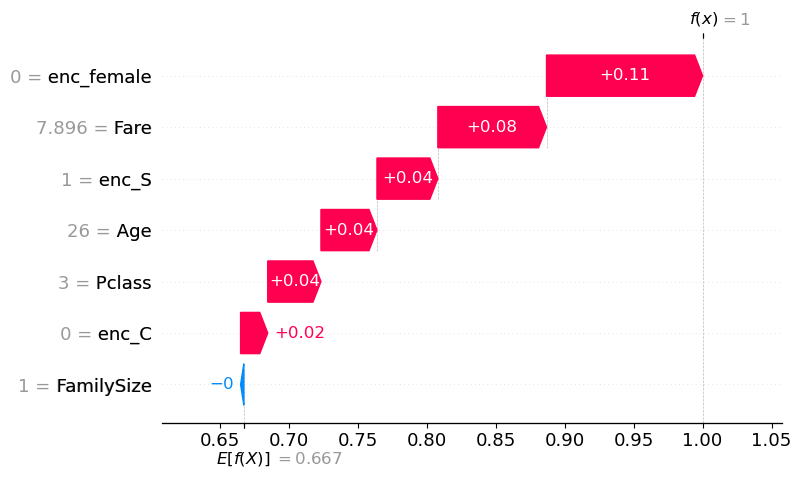

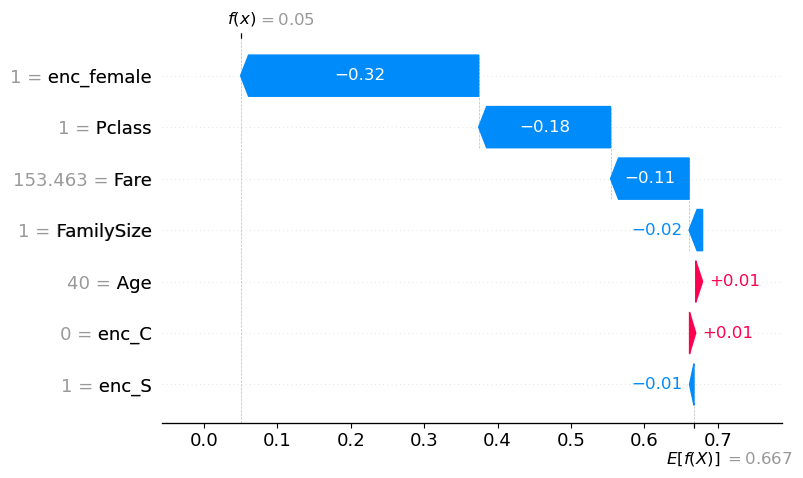

In [ ]:
shap.plots.waterfall(shap_values[row_idx_test_0, :, 0])
shap.plots.waterfall(shap_values[row_idx_test_1, :, 0])

## Comparing Linear and Random Forest models

No significant change for the individual passenger who survived but the linear model interpretation for the deceased invidual shows more positive model impacts than the Random Forest. We can also note that feature importance ranking is also largely consistent between algorithms, with only minor variations.

![SHAP Review Plots](SHAP2-Review.png)

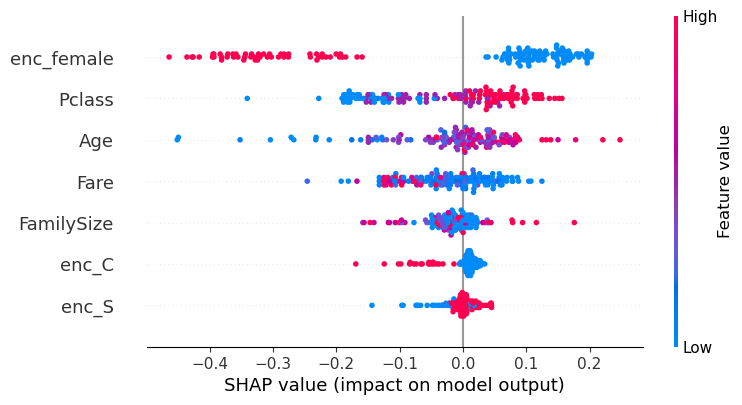

In [ ]:
shap.plots.beeswarm(shap_values[:, :, 0])

A low fare means there is a stronger likelihood of not surviving, especially fares lower than £40. This is supported by the knowledge that 3rd class passengers paid less and were less likely to be permitted access to lifeboats.

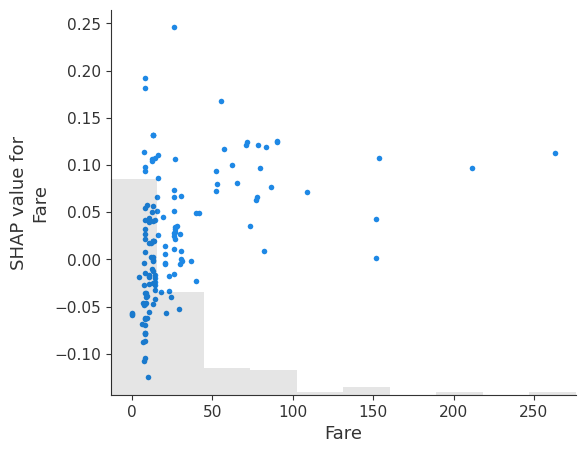

In [ ]:
shap.plots.scatter(shap_values[:,"Fare",1])

- People travelling alone or with fewer siblings and/or spouses were more likely to survive. Adults traveling alone had a better chance of survival compared to those travelling with children, possibly because they could focus more on their own evacuation.
- Travelling with 1 or 2 passengers also contributed positively to a person's survival chances. This is likely because women and children were permitted access to lifeboats first.
- However, having too large a family size decreased a passenger's chance of survival. This is likely because larger family sizes may have faced difficulties in securing spots on lifeboats or coordinating evacuation efforts.

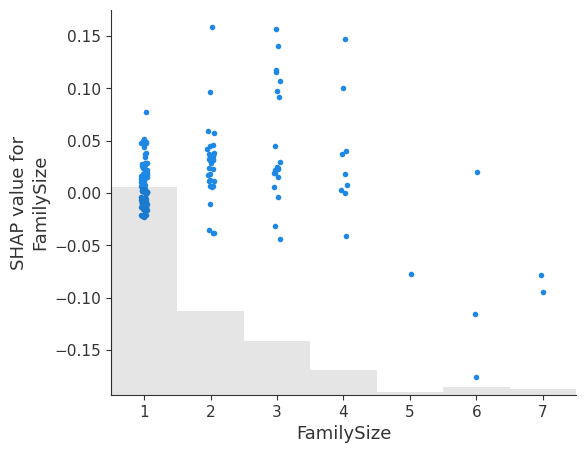

In [ ]:
shap.plots.scatter(shap_values[:,"FamilySize",1])

First class passengers were more likely to survive, followed by 2nd class, and 3rd class passengers were least likely to survive.

Again, we can offer some interpretation based on either domain knowledge or findings of EDA.

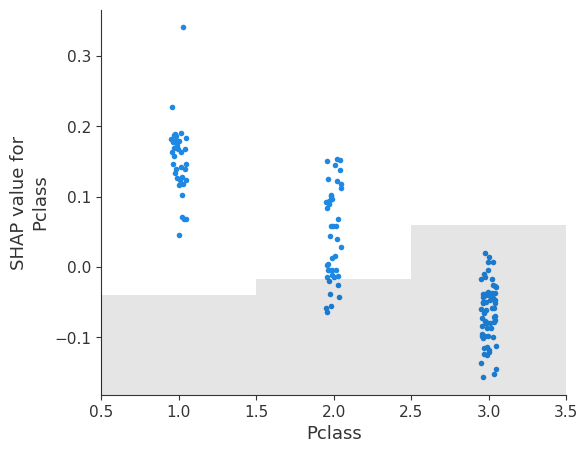

In [ ]:
shap.plots.scatter(shap_values[:,"Pclass",1])

Children under the age of 10 were more likely to survive. We know that women and children were allowed onto the limited number of lifeboats first, so this supports our observations.

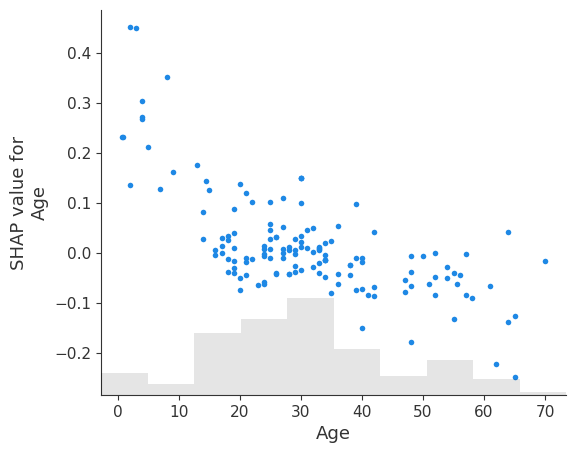

In [ ]:
shap.plots.scatter(shap_values[:,"Age",1])

- Younger 3rd class passengers were more likely to survive than adults in 3rd class, but adult age was not a contributing factor to their survival chances.
- 2nd class passengers had a neutral chance of survival (SHAP values close to zero) regardless of age, but children under 10 were significantly more likely to survive.
- 1st class passenger older than 45 years were less likely to survive (SHAP values are negative). The reduction in SHAP values is linear in this class below age 18, i.e. adults.

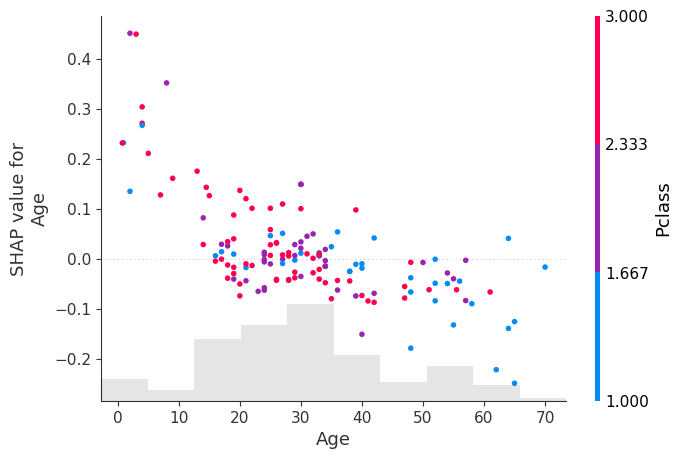

In [ ]:
# Since shap_values is a 2D array
shap_values_age = shap_values[:, X.columns.get_loc('Age')][:, 1]
shap_values_class = shap_values[:, X.columns.get_loc('Pclass')][:, 1]

# Create a scatter plot for the 'Age' feature colored by 'Pclass'
shap.plots.scatter(shap_values_age, color=shap_values_class)

## Week 6. Partial Dependence and Individual Conditional Expectation Plots

Partial dependence plots show how the probability of a particular class being predicted changes with respect to a feature of interest while averaging out the effects of all other features.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

<ul>
    <li>
        <p>Partial Dependence Plots provide a comprehensive view of the relationship between individual features and the target variable, although they can sometimes appear cluttered. However, focusing on the average trends can offer clearer insights.</p>
        <ul><br>
            <li>
                <p><b>The analysis indicates that minors, particularly those below 18 years old, had notably higher odds of survival.</b></p>
                <ul>
                    <li>
                        <p>This is consistent with historical accounts that women and children were given priority access to lifeboats during the Titanic disaster. This observation aligns with the societal norm of "women and children first" during emergencies.</p>
                    </li>
                    <li>
                        <p>Children and teenagers might have been more agile, requiring less assistance to navigate through the chaotic situation onboard the sinking ship.</p>
                    </li>
                    <li>
                        <p>Minors might have been more likely to fit into available lifeboats due to their smaller size, increasing their chances of survival compared to adults.</p>
                    </li>
                </ul>
            </li><br>
            <li>
                <p><b>The trend showing higher survival rates for passengers paying higher fares may be more complex. Passengers who paid higher fares demonstrated increased chances of survival, peaking at around £60. Beyond this threshold, the survival rate plateaus.</b></p>
                <ul>
                    <li>
                        <p>Higher-fare tickets might have corresponded to better accommodations or cabins located closer to the upper decks where lifeboats were stationed.</p>
                    </li>
                    <li>
                        <p>Higher fare prices might also be correlated with passengers of higher social standing or wealthier individuals. Such passengers may have had better access to information, resources, or assistance during the crisis, enhancing their chances of survival.</p>
                    </li>
                    <li>
                        <p>Passengers paying higher fares were more likely be able to read, allowing them to familiarize themselves with the ship's layout and evacuation procedures on signs. This familiarity could have improved their response time and decision-making during the emergency.</p>
                    </li>
                    <li>
                        <p>Crew members or staff might have prioritized passengers who paid higher fares during the evacuation process, either consciously or unconsciously, due to perceived social status or expectations of reciprocity.</p>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>


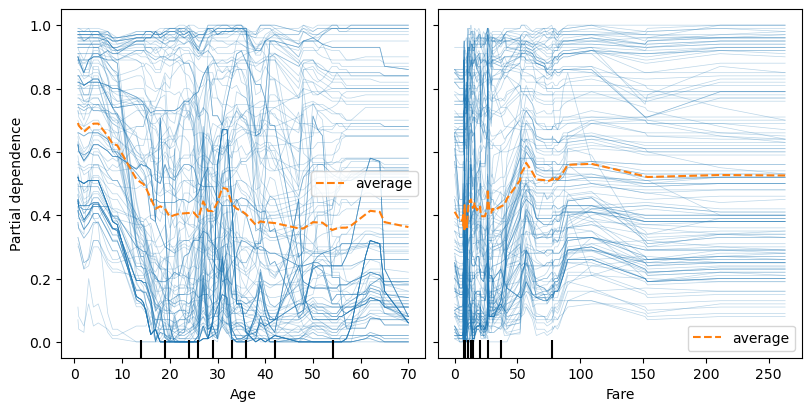

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfc, X_test, features=['Age', 'Fare'],
    kind='both', ax=ax, n_cols=2
);

In [ ]:
pdv_age = partial_dependence(
    rfc, X_test, features=['Age'], kind='both',
    grid_resolution=30
)

pdv_fare = partial_dependence(
    rfc, X_test, features=['Fare'], kind='both',
    grid_resolution=30
)

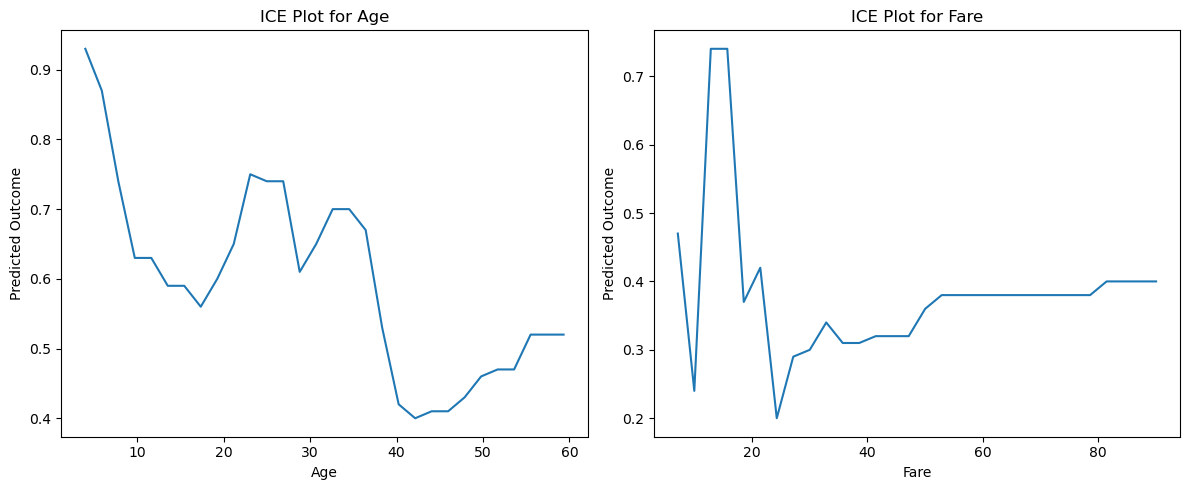

In [ ]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ICE Plot for 'Age' Feature
sns.lineplot(y=pdv_age['individual'][0][0], x=pdv_age['grid_values'][0], ax=axs[0])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Predicted Outcome')
axs[0].set_title('ICE Plot for Age')

# ICE Plot for 'Fare' Feature
sns.lineplot(y=pdv_fare['individual'][0][0], x=pdv_fare['grid_values'][0], ax=axs[1])
axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Predicted Outcome')
axs[1].set_title('ICE Plot for Fare')

plt.tight_layout()
plt.show()

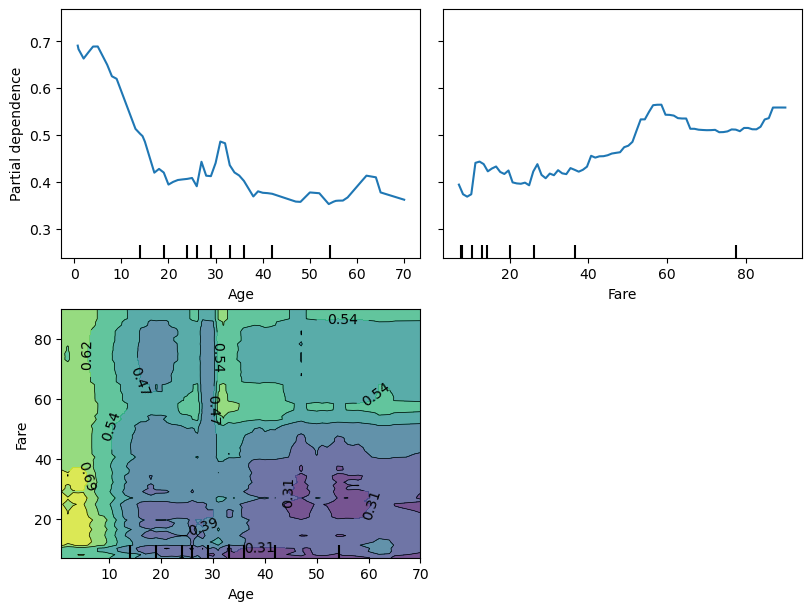

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfc, X_test, features=['Age', 'Fare', ('Age', 'Fare')],
    kind='average',
    subsample=100, grid_resolution=80, random_state=0,
    ax=ax, n_cols=2
);

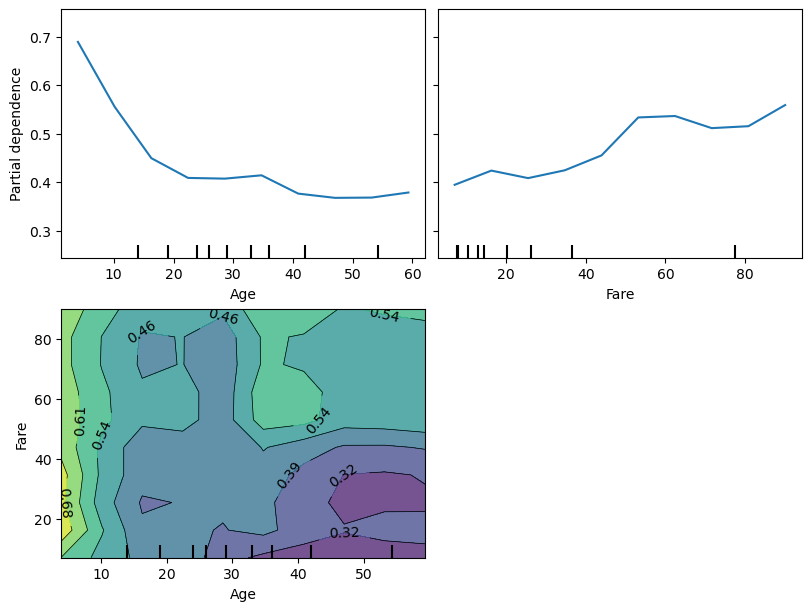

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfc, X_test, features=['Age', 'Fare', ('Age', 'Fare')],
    kind='average',
    subsample=100, grid_resolution=10, random_state=0,
    ax=ax, n_cols=2
);

There is an interaction between the two features below 15 years that is also observed as a larger slope in the 1D Age plot but the spikes produce noise in the 2D grid. By reducing the resolution, we can smooth out these effects and see that `Age` has an impact on the survival of passengers that is independent of `Fare` for adults.

We also observe that survival rates can match those of minors into older adults when `Fare` is highest.

## Week 7. Automated Feature Selection

In [ ]:
!pip install --upgrade scikit-learn==1.4.0 -q
!pip install --upgrade category_encoders -q

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0017-2324/main/datasets/titanic.csv')

df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Engineering

In [ ]:
# modified from https://medium.com/@praoiticica/titanic-data-cleaning-and-feature-engineering-9f122752097f

# Create ne "Companions" column
df['Companions'] = df['Ticket'].duplicated(keep=False).astype(int) * df.groupby('Ticket')['Ticket'].transform('count') -1
df.loc[df['Companions'] == -1, 'Companions'] = 0
print("\n")

# Check distribution of "Companions" column
print("Distribution of 'Companions': ", df['Companions'].value_counts())
print("\n")

import re

# Define the function to extract the title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        title = title_search.group(1)
        # Count occurrences of this title
        title_count = df[df['Name'].str.contains(title, regex=False)].shape[0]
        # Return "Other" if count < 5, otherwise return the title
        return title if title_count >= 5 else "Other"
    return ""

# Apply the function to create a new column 'Title'
df['Title'] = df['Name'].apply(get_title)

# Group by 'Title' and 'Sex' and aggregate statistics
df_grouped = df.groupby(['Title', 'Sex']).agg({'Survived': ['sum', lambda x: x.count() - x.sum()]})
df_grouped.columns = ['Survived', 'Non-Survived']
df_grouped['Count'] = df.groupby(['Title', 'Sex']).size()

print(df_grouped)




Distribution of 'Companions':  0    547
1    188
2     63
3     44
6     21
5     18
4     10
Name: Companions, dtype: int64


               Survived  Non-Survived  Count
Title  Sex                                  
Col    male           1             1      2
Dr     female         1             0      1
       male           2             4      6
Master male          23            17     40
Miss   female       127            55    182
Mr     male          81           436    517
Mrs    female        99            26    125
Other  female         6             0      6
       male           2             4      6
Rev    male           0             6      6


In [ ]:
# Create a new column 'FamilySize' by adding 'Parch' and 'SibSp'
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [ ]:
# Create user-defined function
def travel_alone(SibSp, Parch):

    if SibSp==0 and Parch==0:
        return 1
    elif SibSp>=1 or Parch>=1:
        return 0

# Apply condition to new column
df['Alone'] = df.apply(
lambda x: travel_alone(x['SibSp'], x['Parch']),
axis=1
)

In [ ]:
# Extracting the letters to create a 'Deck' column
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z]+)')

In [ ]:
# Define fare bins
fare_bins = [0, 10, 30, 50, np.inf]  # Define your desired fare bins here

# Create labels for the fare bins
fare_labels = ['0-10', '10-30', '30-50', '50+']

# Bin the 'Fare' column
df['Fare_Bin'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

### Data Cleaning

In [ ]:
df = df.drop(columns=['Name', 'Cabin', 'Ticket'])

In [ ]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Companions', 'Title', 'FamilySize', 'Alone', 'Deck',
       'Fare_Bin'],
      dtype='object')

In [ ]:
# Show the count of missing values (NaN) for each column and the number of unique entries
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].isnull().sum()]

variables

,Variable,Number of unique values,Number of nulls
0,Survived,2,0
1,Pclass,3,0
2,Sex,2,0
3,Age,88,177
4,SibSp,7,0
5,Parch,7,0
6,Fare,248,0
7,Embarked,3,2
8,Companions,7,0
9,Title,8,0


In [ ]:
# Grouping by 'Pclass', 'Fare_Bin', and finding the most common 'Deck'
def mode_or_unknown(x):
    deck_counts = x.value_counts()
    if len(deck_counts) > 0:
        return deck_counts.index[0]
    else:
        return 'Unknown'

common_deck = df.groupby(['Pclass', 'Fare_Bin'])['Deck'].agg(mode_or_unknown).reset_index()

# Fill 'Deck' column with the mode for the corresponding 'Fare_Bin' categories
for index, row in common_deck.iterrows():
    mask = (df['Pclass'] == row['Pclass']) & (df['Fare_Bin'] == row['Fare_Bin'])
    mode_deck = row['Deck']
    df.loc[mask, 'Deck'] = df.loc[mask, 'Deck'].fillna(mode_deck)

In [ ]:
# Loop through unique 'Pclass' values and display unique 'Deck' values for each 'Pclass'
unique_pclasses = df['Pclass'].unique()
for pclass in unique_pclasses:
    subset_data = df[df['Pclass'] == pclass]
    n_unique = subset_data['Deck'].nunique()
    if n_unique <= 88:  # Checking if the number of unique values is manageable
        unique_values = subset_data['Deck'].unique()
        print(f'Pclass {pclass} - Deck ({n_unique}): {unique_values}\n')
    else:
        print(f'Pclass {pclass} - Deck ({n_unique})\n')

Pclass 3 - Deck (4): ['F' 'G' 'Unknown' 'E']

Pclass 1 - Deck (6): ['C' 'E' 'A' 'B' 'D' 'T']

Pclass 2 - Deck (4): ['F' 'D' 'Unknown' 'E']



In [ ]:
# Age - impute mean
df['Age'].fillna((df['Age'].mean()), inplace=True)

# Embarked - impute mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df = df.drop(columns=['Fare_Bin'])

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Companions    0
Title         0
FamilySize    0
Alone         0
Deck          0
dtype: int64

### Data Pre-Processing for ML

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Companions,Title,FamilySize,Alone,Deck
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,Mr,2,0,F
2,1,1,female,38.0,1,0,71.2833,C,0,Mrs,2,0,C
3,1,3,female,26.0,0,0,7.9250,S,0,Miss,1,1,F
4,1,1,female,35.0,1,0,53.1000,S,1,Mrs,2,0,C
5,0,3,male,35.0,0,0,8.0500,S,0,Mr,1,1,F


In [ ]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Companions', 'Title', 'FamilySize', 'Alone', 'Deck'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Companions  891 non-null    int64  
 9   Title       891 non-null    object 
 10  FamilySize  891 non-null    int64  
 11  Alone       891 non-null    int64  
 12  Deck        891 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 97.5+ KB


In [ ]:
# One-hot encode the categorical columns
df_ext = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Deck'], prefix='enc')

# Display the first few rows of the encoded DataFrame
df_ext.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Companions,FamilySize,Alone,enc_female,...,enc_Rev,enc_A,enc_B,enc_C,enc_D,enc_E,enc_F,enc_G,enc_T,enc_Unknown
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,38.0,1,0,71.2833,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,35.0,1,0,53.1000,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_ext = df_ext.drop(columns=['enc_male', 'enc_Q', 'enc_Other', 'enc_Unknown'])

In [ ]:
# Define X and y
X_ext, y_ext = df_ext.drop(columns='Survived'), df_ext['Survived']

# Split the dataset
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.2, random_state=42)

In [ ]:
# Define X and y
X, y = df_encoded.drop(columns='Survived'), df_encoded['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_ext.keys()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Companions', 'FamilySize',
       'Alone', 'enc_female', 'enc_C', 'enc_S', 'enc_Col', 'enc_Dr',
       'enc_Master', 'enc_Miss', 'enc_Mr', 'enc_Mrs', 'enc_Rev', 'enc_A',
       'enc_B', 'enc_C', 'enc_D', 'enc_E', 'enc_F', 'enc_G', 'enc_T'],
      dtype='object')

### Automated Feature Selection (AFS): Univariate

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector_ext = SelectKBest(f_regression, k=5).fit(X_ext, y_ext)
X_sel_ext = selector_ext.transform(X_ext)

selector = SelectKBest(f_regression, k=5).fit(X, y)
X_sel = selector.transform(X)

In [ ]:
print("Extended dataset: ", selector_ext.get_feature_names_out())
print()
print("Original dataset: ", selector.get_feature_names_out())

Extended dataset:  ['Pclass' 'enc_female' 'enc_Miss' 'enc_Mr' 'enc_Mrs']

Original dataset:  ['Pclass' 'Fare' 'enc_female' 'enc_C' 'enc_S']


In [ ]:
model_ext = LinearRegression().fit(X_sel_ext, y_ext)
scores_ext = cross_val_score(model_ext, X_sel_ext, y_ext)
scores_ext.mean(), scores_ext.std()

(0.3731561765093778, 0.04465765218220464)

In [ ]:
model = LinearRegression().fit(X, y)
scores = cross_val_score(model, X, y)
scores.mean(), scores.std()

(0.3640918528252791, 0.05123598900923259)

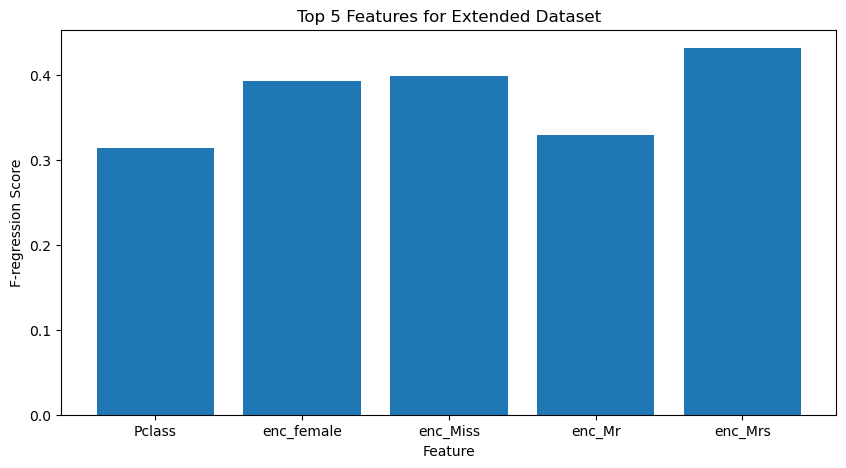

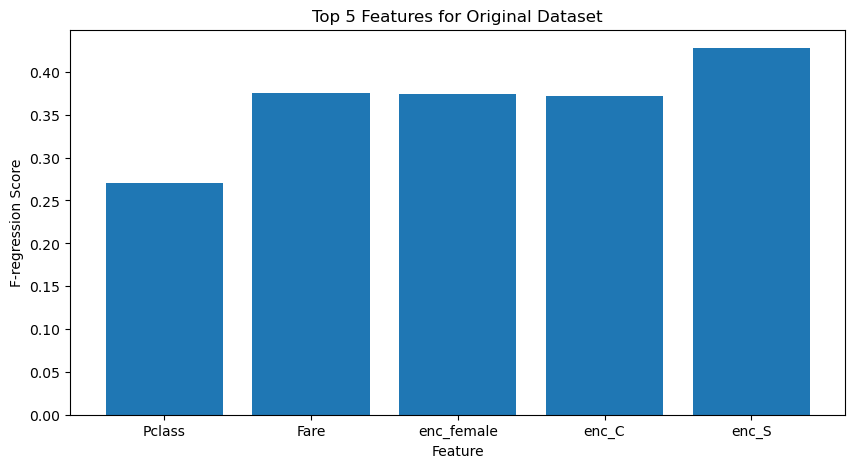

In [ ]:
feature_names_ext = selector_ext.get_feature_names_out()
feature_names = selector.get_feature_names_out()

# Plot the scores for the selected features in the extended dataset
plt.figure(figsize=(10, 5))
plt.bar(feature_names_ext, scores_ext)
plt.xlabel('Feature')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features for Extended Dataset')
plt.show()

# Plot the scores for the selected features in the original dataset
plt.figure(figsize=(10, 5))
plt.bar(feature_names, scores)
plt.xlabel('Feature')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features for Original Dataset')
plt.show()

### Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
# Define your estimator
model = LinearRegression()

# Create RFECV instance
ref_selector_ext = RFECV(model, step=1, cv=5)
ref_selector = RFECV(model, step=1, cv=5)

# Fit RFECV instance to your data
ref_selector_ext.fit(X_ext, y_ext)
ref_selector.fit(X, y)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
X_sel_ext = ref_selector_ext.transform(X_ext)
X_sel = ref_selector.transform(X)

In [ ]:
print("Features extended dataset: ", ref_selector_ext.get_feature_names_out())
print()
print("Features original dataset: ", ref_selector.get_feature_names_out())

Features extended dataset:  ['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Companions' 'FamilySize' 'Alone'
 'enc_female' 'enc_C' 'enc_S' 'enc_Col' 'enc_Dr' 'enc_Master' 'enc_Miss'
 'enc_Mr' 'enc_Mrs' 'enc_Rev' 'enc_A' 'enc_B' 'enc_C' 'enc_D' 'enc_E'
 'enc_F' 'enc_G' 'enc_T']

Features original dataset:  ['Pclass' 'Age' 'enc_female' 'enc_C' 'enc_S' 'FamilySize']


In [ ]:
n_scores_ext = len(ref_selector_ext.cv_results_["mean_test_score"])
n_scores = len(ref_selector.cv_results_["mean_test_score"])
print("Extended dataset: ", n_scores_ext)
print("Original dataset: ", n_scores)

Extended dataset:  26
Original dataset:  7


Mean test score is very bad, but RFE tells us that we only need a few features to achieve approximately the best score. After that we are in an area of diminishing returns. For a 10% increase in mean test score, we must go from 2 features to 16 features, which increases model complexity.

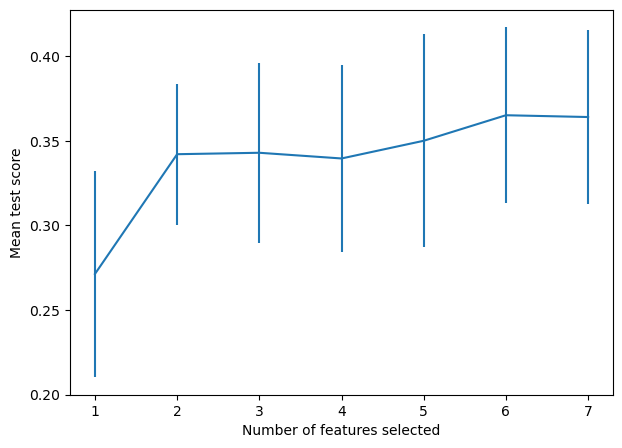

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

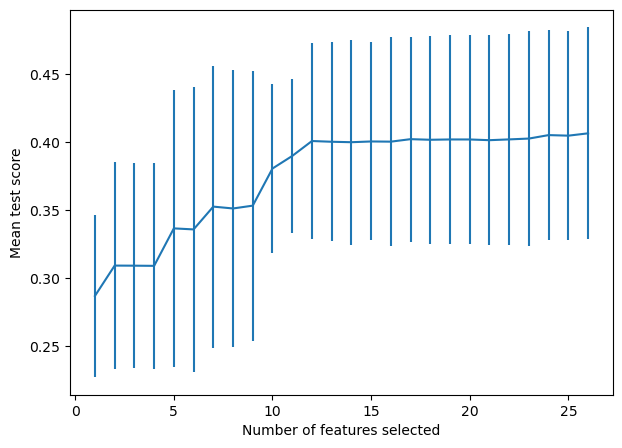

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores_ext+1),
    ref_selector_ext.cv_results_["mean_test_score"],
    yerr=ref_selector_ext.cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

### Sequential Feature Selection (SFS) (Forward/Backward)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs_forward_ext = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select='auto', direction="forward"
).fit(X_ext, y_ext)

sfs_forward = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select='auto', direction="forward"
).fit(X, y)

In [ ]:
print("Features extended dataset: ", sfs_forward_ext.get_feature_names_out())
print()
print("Features original dataset: ", sfs_forward.get_feature_names_out())

Features extended dataset:  ['Pclass' 'Age' 'Fare' 'FamilySize' 'enc_female' 'enc_S' 'enc_Master'
 'enc_Miss' 'enc_Mr' 'enc_Rev' 'enc_D' 'enc_E' 'enc_G']

Features original dataset:  ['Pclass' 'Age' 'enc_female']


In [ ]:
X_sel_ext = sfs_forward_ext.transform(X_ext)
X_sel = sfs_forward.transform(X)

In [ ]:
model_ext = LinearRegression().fit(X_sel_ext, y_ext)
scores_ext = cross_val_score(model_ext, X_sel_ext, y_ext)
scores_ext.mean(), scores_ext.std()

(0.4249466450454257, 0.06805715415441137)

In [ ]:
model = LinearRegression().fit(X_sel, y)
scores = cross_val_score(model, X_sel, y)
scores.mean(), scores.std()

(0.36101060514130046, 0.05033783438388017)

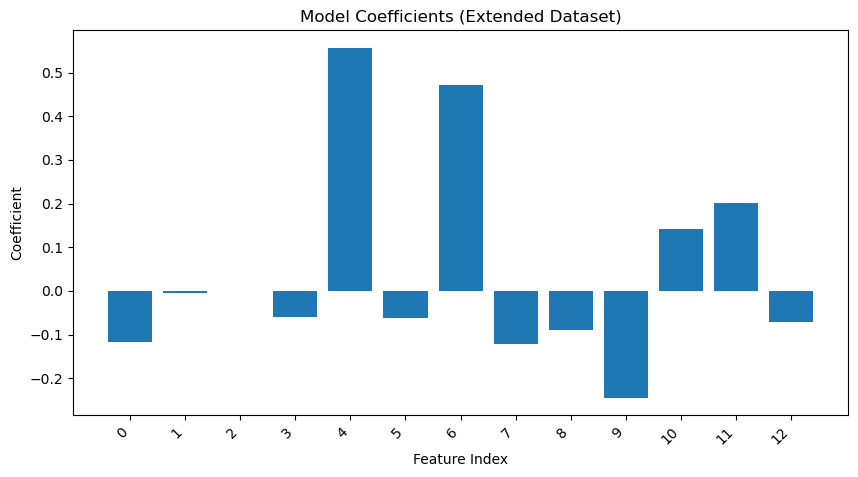

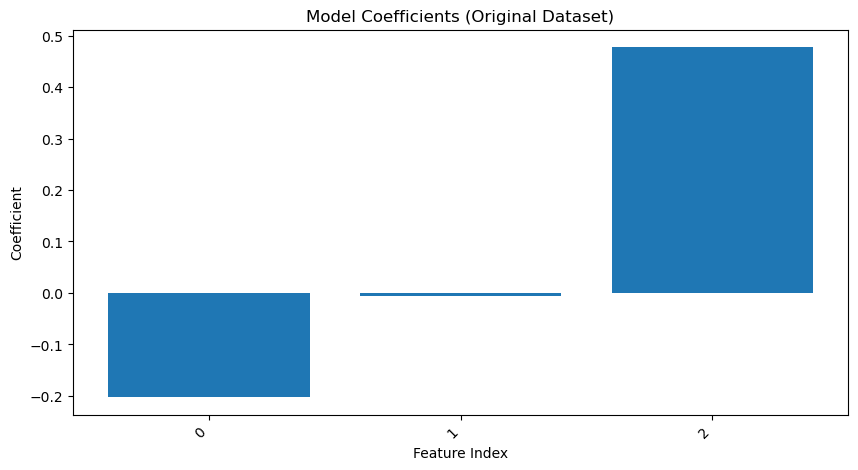

In [ ]:
# Get the model coefficients for the extended dataset
selected_coefs_ext = model_ext.coef_
selected_coefs = model.coef_

# Generate feature indices for plotting
feature_indices_ext = range(len(selected_coefs_ext))
feature_indices = range(len(selected_coefs))

# Plot the coefficients for the selected features in the extended dataset
plt.figure(figsize=(10, 5))
plt.bar(feature_indices_ext, selected_coefs_ext)
plt.title("Model Coefficients (Extended Dataset)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.xticks(feature_indices_ext, rotation=45, ha="right")
plt.show()

# Plot the coefficients for the selected features in the original dataset
plt.figure(figsize=(10, 5))
plt.bar(feature_indices, selected_coefs)
plt.title("Model Coefficients (Original Dataset)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.xticks(feature_indices, rotation=45, ha="right")
plt.show()


## Week 8. Principle Component Analysis and Dimensionality Reduction

PCA extracts the most relevant data from the original dataset and aims to reduce dimensionality. It does this by transforming colinear features into linearly correlated feature values to produce new features (principal components) (*Ampomah et al. 2020*)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Define X and y
X_ext, y_ext = df_ext.drop(columns='Survived'), df_ext['Survived']

# Set 80% of data for training set
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext, y_ext, test_size=0.2, random_state=42)

# Print results
print("X train=", X_train_ext.shape, "y_train=", y_train_ext.shape)
print("X_test=", X_test_ext.shape, "y_test=", y_test_ext.shape)

X train= (712, 26) y_train= (712,)
X_test= (179, 26) y_test= (179,)


In [ ]:
X_ext.keys()

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Companions', 'FamilySize',
       'Alone', 'enc_female', 'enc_C', 'enc_S', 'enc_Col', 'enc_Dr',
       'enc_Master', 'enc_Miss', 'enc_Mr', 'enc_Mrs', 'enc_Rev', 'enc_A',
       'enc_B', 'enc_C', 'enc_D', 'enc_E', 'enc_F', 'enc_G', 'enc_T'],
      dtype='object')

In [ ]:
# Scaling the train data
scaler = StandardScaler()
X_scaled_ext = scaler.fit_transform(X_ext)

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_scaled_ext)

PCA(random_state=42)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.188524,0.188524
1,0.306727,0.118203
2,0.391125,0.084397
3,0.457171,0.066047
4,0.510861,0.053689
5,0.556842,0.045981
6,0.599801,0.042959
7,0.641955,0.042153
8,0.682819,0.040865
9,0.721983,0.039164


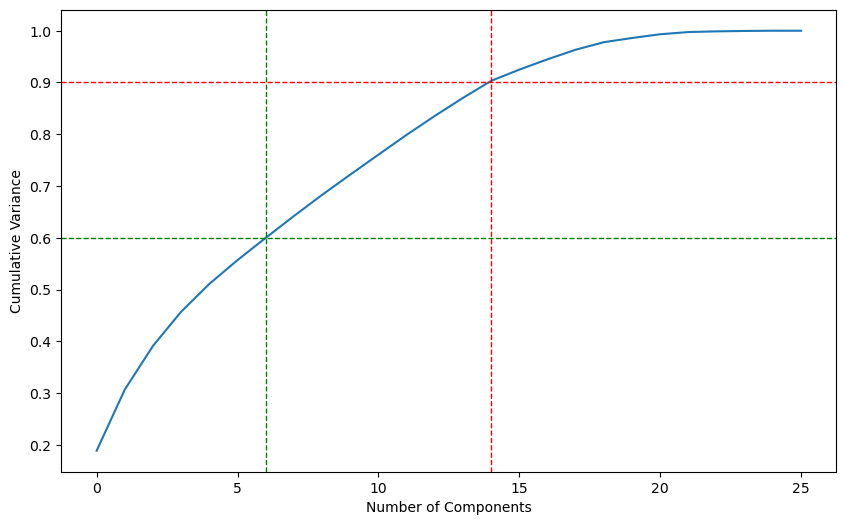

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 14, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 6, color='green', linestyle='dashed', linewidth=1)

**14 components describe 90% variance in the data**

Both the cumulative plot and DataFrame show that with just 6 variables the explained variance (the difference between model predictions and actual data) reaches the 60% that is considered a minimum for machine learning models. The addition of a further 8 variables progressively increases the proportion of explainable variance up to 90%. The remaining components only explain 10% of the variance so can be cut to simplify the model.

In [ ]:
# PCA with 14 components
pca_14 = PCA(n_components=14)
X_pca = pca_14.fit(X_scaled_ext)
X_pca = pca_14.transform(X_scaled_ext)

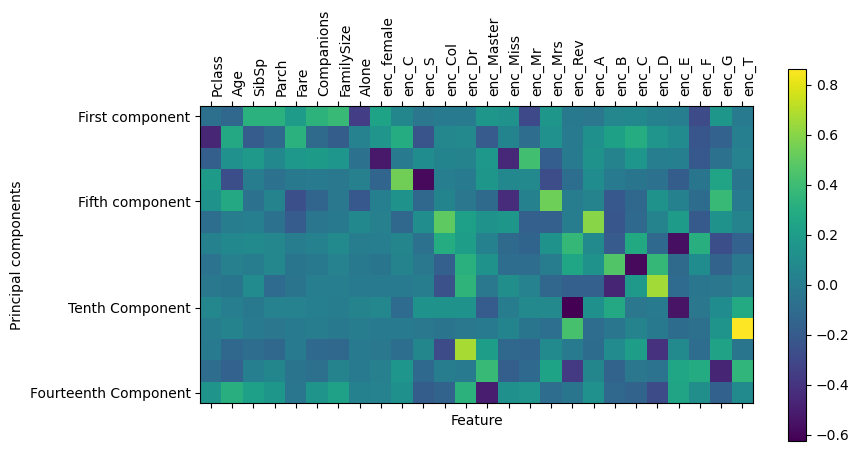

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca_14.components_, cmap='viridis')
plt.yticks([0, 4, 9, 13], ["First component", "Fifth component", "Tenth Component", "Fourteenth Component"])
plt.colorbar()
plt.xticks(range(len(X_ext.columns)),
           X_ext.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
# PCA with 6 components
pca_6 = PCA(n_components=6)
X_pca = pca_6.fit(X_scaled_ext)
X_pca = pca_6.transform(X_scaled_ext)

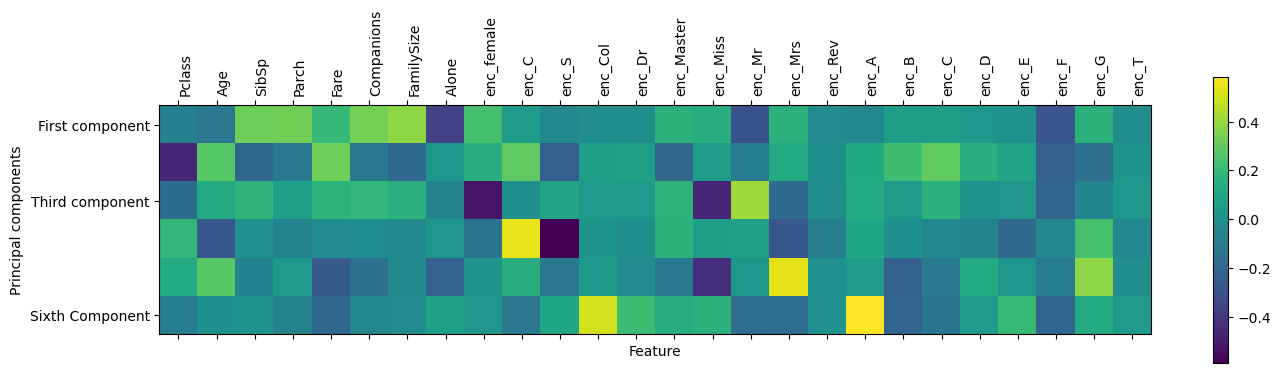

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca_6.components_, cmap='viridis')
plt.yticks([0, 2, 5], ["First component", "Third component", "Sixth Component"])
plt.colorbar()
plt.xticks(range(len(X_ext.columns)),
           X_ext.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
# Define X and y
X, y = df_encoded.drop(columns='Survived'), df_encoded['Survived']

# Set 80% of data for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print results
print("X train=", X_train.shape, "y_train=", y_train.shape)
print("X_test=", X_test.shape, "y_test=", y_test.shape)

X train= (569, 7) y_train= (569,)
X_test= (143, 7) y_test= (143,)


In [ ]:
X.keys()

Index(['Pclass', 'Age', 'Fare', 'enc_female', 'enc_C', 'enc_S', 'FamilySize'], dtype='object')

In [ ]:
# Scaling the train data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.335229,0.335229
1,0.546997,0.211768
2,0.733650,0.186653
3,0.849587,0.115937
4,0.932297,0.082710
5,0.984257,0.051959
6,1.000000,0.015743


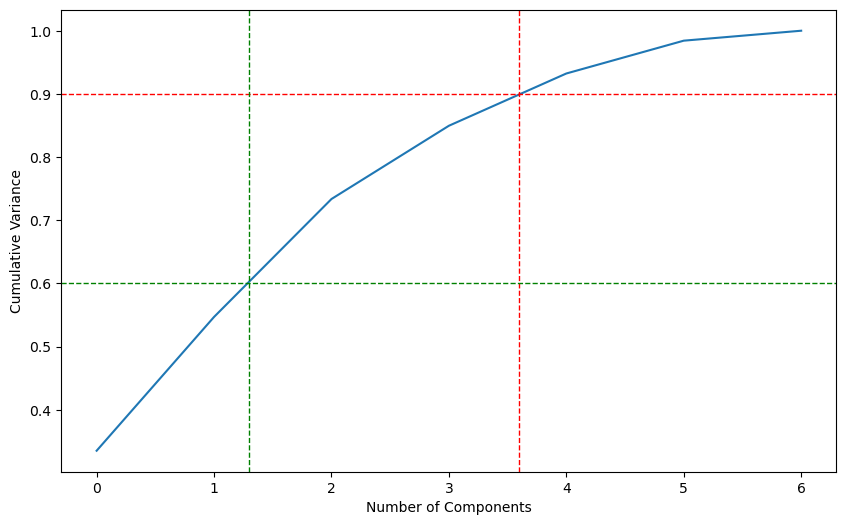

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,6))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 3.6, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 1.3, color='green', linestyle='dashed', linewidth=1)

**4 components describe more than 90% variance in the data**

Both the cumulative plot and DataFrame show that with just 2 variables the explained variance (the difference between model predictions and actual data) reaches greater than the 60% that is considered a minimum for machine learning models. The addition of a further 2 variables progressively increases the proportion of explainable variance up to 90%. The remaining components only explain 10% of the variance so can be cut to simplify the model.

In [ ]:
# PCA with 4 components
pca_4 = PCA(n_components=4)
X_pca = pca_4.fit(X_scaled)
X_train_pca = pca_4.transform(X_scaled)

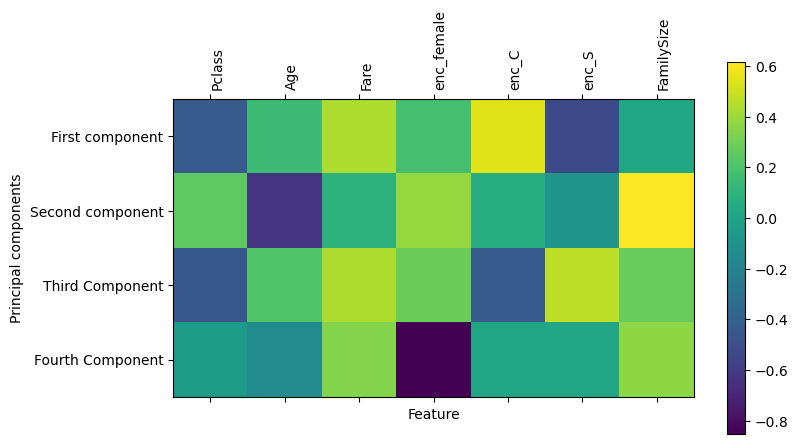

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca_4.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3], ["First component", "Second component", "Third Component", "Fourth Component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
# PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit(X_scaled)
X_pca = pca_2.transform(X_scaled)

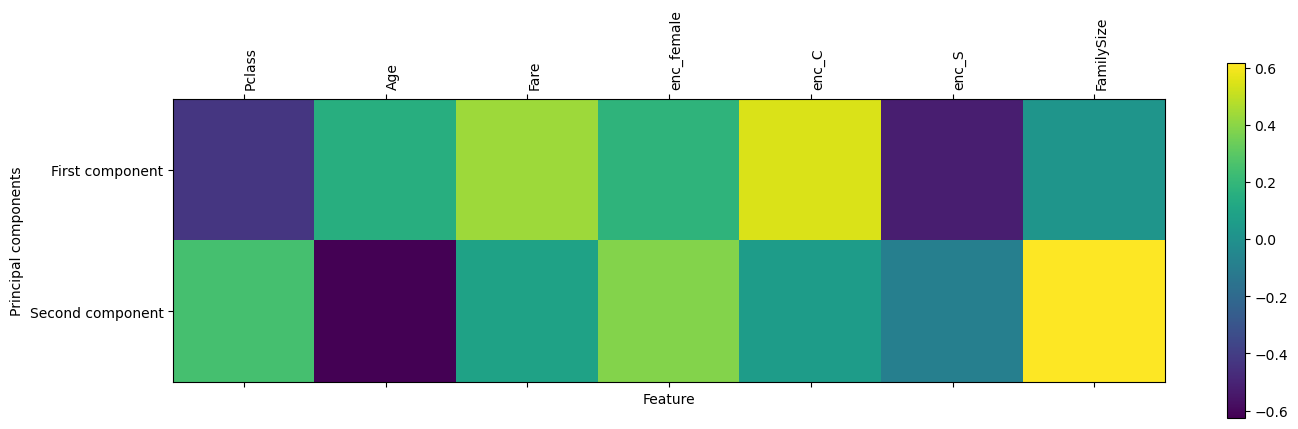

In [ ]:
# Show contribution of each feature on each component
plt.matshow(pca_2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [ ]:
deceased = X[y == 0]
survived = X[y == 1]

In [ ]:
# keep the first four principal components of the data
pca = PCA(n_components=4)
# fit PCA model to titanic
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

deceased_pca = pca.transform(deceased)

Original shape: (712, 7)
Reduced shape: (712, 4)


X has feature names, but PCA was fitted without feature names


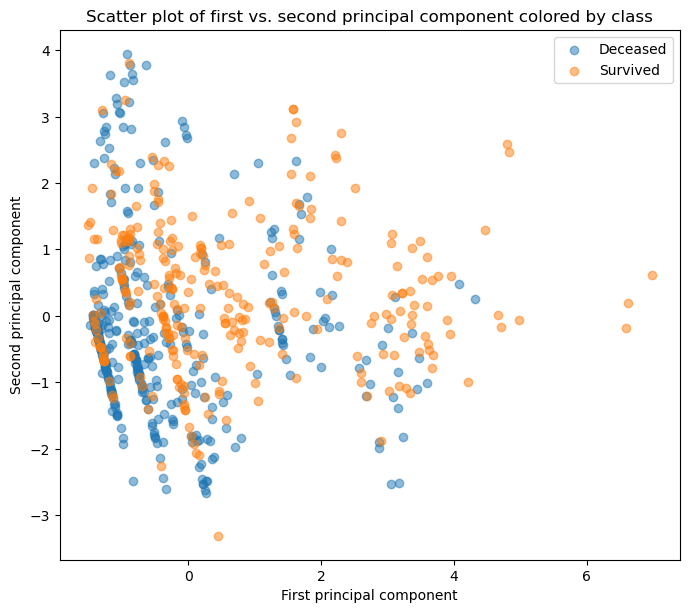

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x=X_pca[y==0, 0], y=X_pca[y==0, 1], alpha=0.5, label="Deceased")
plt.scatter(x=X_pca[y==1, 0], y=X_pca[y==1, 1], alpha=0.5, label="Survived")
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Scatter plot of first vs. second principal component colored by class")
plt.show()

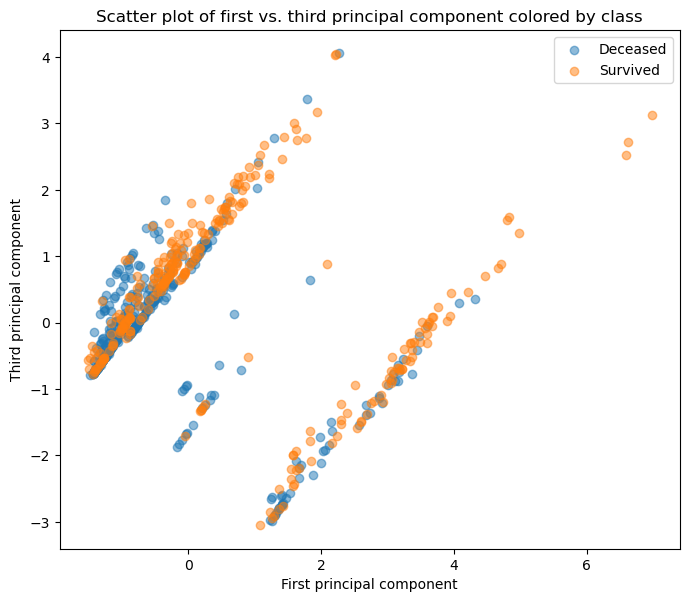

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x=X_pca[y==0, 0], y=X_pca[y==0, 2], alpha=0.5, label="Deceased")
plt.scatter(x=X_pca[y==1, 0], y=X_pca[y==1, 2], alpha=0.5, label="Survived")
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Third principal component")
plt.title("Scatter plot of first vs. third principal component colored by class")
plt.show()


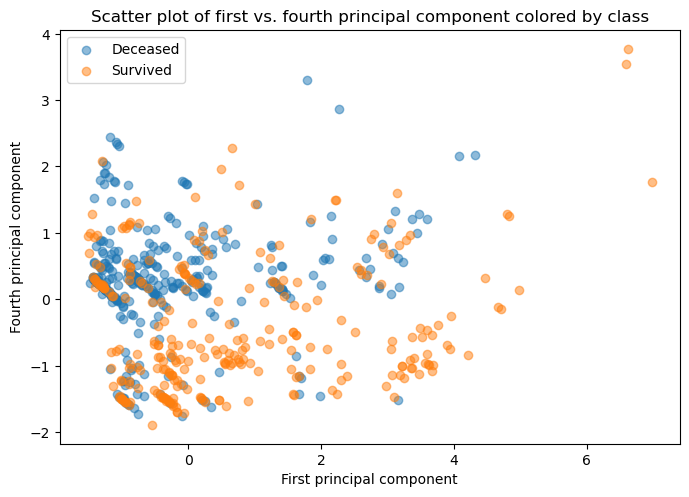

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x=X_pca[y==0, 0], y=X_pca[y==0, 3], alpha=0.5, label="Deceased")
plt.scatter(x=X_pca[y==1, 0], y=X_pca[y==1, 3], alpha=0.5, label="Survived")
plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Fourth principal component")
plt.title("Scatter plot of first vs. fourth principal component colored by class")
plt.show()


We might be able to say that if the fourth principle component is negative then the passengers were more likely to survive but, in this datset, is is difficult to attribute a feature on the components so we don't really know what these components represent; they are abstract. There's also no distinct pattern emerging.